# Machine Learning coursework 
## Student Number: 
This project will embark in machine learning through a comprehensive analysis of the UCI Online Retail II dataset. This dataset, known for its detailed portrayal of retail transactions, provides a rich ground for exploring various machine learning techniques. Our project is an exciting journey through clustering, classification, and regression, with an aim to extract meaningful insights that can revolutionize business strategies in the retail sector.

In [1]:
pip install plotly # 3D dynamic scatter plot

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install squarify # Making a tree diagram

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Standard library imports
import os
from pathlib import Path
import math
import datetime as dt

# Data manipulation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D #3D scatter plot
import plotly.graph_objects as go # Using Plotly to make a dynamic scatter plot
import squarify # Making a tree diagram

# Machine learning and statistical tools
from sklearn.model_selection import train_test_split

# Clustering
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#Classification

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

In [4]:
# Making colour pallete
Pretty_colors = [
    '#636EFA',  # Blue
    '#EF553B',  # Red
    '#00CC96',  # Mint
    '#FFA15A',  # Orange
    '#AB63FA',  # Purple 
    '#19D3F3',  # Light Blue
    '#FF6692',  # Pink
    '#B6E880',  # Light Green
    '#FF97FF',  # Pale Pink
    '#FECB52'   # Yellow
]

In [5]:
## Setting Plot rules
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [10, 7]
sns.set_palette("Set2")

In [6]:
def show_and_save_fig(plt, filename=None):
    if filename is None:
        # Use a timestamp for a unique filename if none is provided
        filename = datetime.datetime.now().strftime("plot_%Y-%m-%d_%H-%M-%S.png")
    else:
        filename += ".png"
    
    # Ensure the filename is safe for the filesystem
    filename = filename.replace("/", "-").replace(":", "-")
    
    # Save the figure
    plt.savefig(filename, format='png', dpi=300)
    print(f"Figure saved as '{filename}' in the working directory.")
    
    # Show the plot
    plt.show()

## Dataset Overview
The UCI Online Retail II dataset is chosen for its breadth of basic variables typically found in retail operations. With data spanning over two years, it offers a substantial temporal range, which is crucial for analyzing customer behavior over time. The dataset originates from a wholesale-focused retailer, but its fundamental characteristics make it a versatile tool for modeling across diverse retail contexts, highlighting its potential for broad industry application.

## Project Outline
To maximize the value derived from this dataset, our project will follow a structured machine learning framework, inspired by the work of Nguyen et al., with the following phases:

1. **Data Understanding:** Dive deep into the dataset to comprehend the features and the interrelationships between them.

2. **Data Preprocessing:** Prepare the data for analysis by cleaning, transforming, and selecting features to ensure quality inputs for our models.

3. **Modeling Phase:** Employ various algorithms for clustering, classification, and regression to build models that can predict outcomes and uncover patterns in the data.

4. **Evaluation Phase:** Rigorously assess the performance of our models using appropriate metrics, ensuring their validity and effectiveness.

5. **Go Live:** Transition from a development setting to a production environment, where the models can start providing value.

6. **Business Insight:** Translate the outputs of our models into empirical applications, offering actionable insights to drive informed business decisions.

By adhering to this framework, we aim to not only build robust machine learning models but also to bridge the gap between data-driven analytics and real-world business applications.

## Preparing the dataset for use

In [7]:
# Specifying which directory to use 
working_dir = Path("/Users/mint/Machine Learning Coursework")
os.chdir(working_dir)

# Verify the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: /Users/mint/Machine Learning Coursework


In [8]:
# Load dataset
online_retail_file = '/Users/mint/Downloads/SAVES/Y3_UOL/ML_coursework/online_retail_II.xlsx'

# Reading the excel file
xls = pd.ExcelFile(online_retail_file)

# Create a list to store each year's data frame before combining them
dfs=[]

# Loop, reading each sheet into a pandas DataFrame
# sheet_name=sheet_name tells pandas which sheet to load into the df
for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    year = sheet_name[5:9] # extracting the year from sheet name
    df['Year'] = year # adding a new column in the df for year, making it easier to identify the data's original sheet (year indication)
    dfs.append(df)

consolidated_df = pd.concat(dfs, ignore_index=True) # Combine all the DataFrames in the list into a single DataFrame.

print(consolidated_df.head()) # Checking if the consolidated files appear as planned
print(consolidated_df.tail())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Year  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009  
        Invoice StockCode                      Description  Quantity  \
1067366  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254    CHILDRENS 

## Exploratory Data Analysis
this step is key to understanding the dataset that we are working with

1. creating a function of key Information in the dataset to be reviewed
2. data cleaning away the NaNs
3. change the data types as appropriate

In [9]:
def df_info(consolidated_df):
    print("------------ Head ------------")  
    print(consolidated_df.head())
    print("------------ Tail ------------")
    print(consolidated_df.tail())
    print("------------ Shape ------------")
    print(consolidated_df.shape)
    print("------------ Types ------------")
    print(consolidated_df.info())
    print("------------ Info ------------")
    print(consolidated_df.columns)
    print("------------ Quantiles ------------")
    print(consolidated_df.describe().T)
    print("------------ NA ------------")
    print(consolidated_df.isnull().sum())
    
# Print the Information
df_info(consolidated_df)

------------ Head ------------
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Year  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009  
------------ Tail ------------
        Invoice StockCode                      Description  Quantity  \
1067366  581587     22899     CHILDREN'S APRON DO

In [10]:
# Clearing the rows without customer ID for now as they will affect the clustering proccess of customers
consolidated_df.dropna(inplace = True)

# Convert Customer ID to integer type so that it does not have decimal
consolidated_df['Customer ID'] = consolidated_df['Customer ID'].astype(int)

# View the data set
print(consolidated_df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Year  
0 2009-12-01 07:45:00   6.95        13085  United Kingdom  2009  
1 2009-12-01 07:45:00   6.75        13085  United Kingdom  2009  
2 2009-12-01 07:45:00   6.75        13085  United Kingdom  2009  
3 2009-12-01 07:45:00   2.10        13085  United Kingdom  2009  
4 2009-12-01 07:45:00   1.25        13085  United Kingdom  2009  


In [11]:
# Exploring stock codes column
unique_stock_codes = consolidated_df['StockCode'].unique()
print(unique_stock_codes)

# Creating a txt file to hold all the stock codes
with open("unique_stock_codes.txt", "w") as file:
    for code in unique_stock_codes:
        file.write(f"{code}\n")

# Convert the 'StockCode' column to string to ensure consistent processing
consolidated_df['StockCode'] = consolidated_df['StockCode'].astype(str)

# Filter unique stock codes that contain no digits
stock_codes_no_integers = consolidated_df['StockCode'].unique()
stock_codes_no_integers = [code for code in stock_codes_no_integers if not any(char.isdigit() for char in code)]

print(stock_codes_no_integers)

[85048 '79323P' '79323W' ... 23562 23561 23843]
['POST', 'D', 'M', 'BANK CHARGES', 'PADS', 'ADJUST', 'DOT', 'CRUK']


### Summary of findings
- understand that the stock code column also contains other variables such as "postage" and "bank charges" which can be considered in our analysis
- have row with negative quantity which will be accounted for as returns
- we know that stock code is unique for each item even with colour variations, hence we can say that it is safe to use "StockCode" col for our analysis rather than the "Description" which is lengthier and hence more prone to variation. but we will keep "Description" as it might be helpful for our analysis later

# Clustering
Clustering will enable us to identify inherent groupings in our data, providing insights into customer segmentation that are not explicitly labeled.

### clustering outline:
1. Feature engineering
2. Data Preprocessing
3. Determine the number of clusters
4. Clustering model training
5. Analysing the profile of clusters: Once clusters are formed, we will analyze their characteristics to profile different segments, using both statistical and visual methods.
6. Validation of cluster: Assess the quality of the clusters using internal validation metrics like cohesion and separation, as well as considering their practical significance in a retail context.

The clusters that are identified from our findings will be translated into targetted actions to enhance business operations


##  Feature Engineering 

In [12]:
##### DATA CLEANING #####
# Seeing how many items I have with returns
negative_quantity_count = len(consolidated_df.query('Quantity < 0'))
print(f"Number of rows with negative quantity: {negative_quantity_count}")

# Create a data frame without returns
df_wo_returns = consolidated_df.loc[consolidated_df['Quantity'] > 0]

# Create a data frame without non stock codes
df_cleaned = df_wo_returns.loc[~df_wo_returns['StockCode'].isin(['POST', 'D', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'])]

# Print info to analyse if further changes are required
df_info(df_cleaned)

Number of rows with negative quantity: 18744
------------ Head ------------
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Year  
0 2009-12-01 07:45:00   6.95        13085  United Kingdom  2009  
1 2009-12-01 07:45:00   6.75        13085  United Kingdom  2009  
2 2009-12-01 07:45:00   6.75        13085  United Kingdom  2009  
3 2009-12-01 07:45:00   2.10        13085  United Kingdom  2009  
4 2009-12-01 07:45:00   1.25        13085  United Kingdom  2009  
------------ Tail ------------
        Invoice StockCode                      Description  Quantity  \
1067

In [13]:
# Finding the most recent invoide date
df_cleaned['InvoiceDate'].max()

# Assingning today's date as 2 days after the the most recent purchase to ensure that recency is not zero
today_date = df_cleaned['InvoiceDate'].max() + dt.timedelta(days=2)
print(today_date)

2011-12-11 12:50:00


In [14]:
## CREATING NEW FEATURES FOR RFM ##
df_rfm = df_cleaned.copy()

# Creating a new 'Total' column for the monetary calculation.
df_rfm.loc[:, 'Total'] = df_rfm['Quantity'] * df_rfm['Price']

# Creating a df called 'RFM' to store the new rfm table
RFM = df_rfm.groupby('Customer ID').agg(
    Recency=('InvoiceDate', lambda x: (today_date - x.max()).days),
    Frequency=('Invoice', 'count'),
    Monetary=('Total', 'sum')
).reset_index()

# Print new df
print(RFM)

      Customer ID  Recency  Frequency  Monetary
0           12346      327         34  77556.46
1           12347        3        253   5633.32
2           12348       76         46   1658.40
3           12349       20        172   3678.69
4           12350      311         16    294.40
...           ...      ...        ...       ...
5860        18283        5        984   2730.70
5861        18284      433         28    461.68
5862        18285      662         12    427.00
5863        18286      478         67   1296.43
5864        18287       44        155   4182.99

[5865 rows x 4 columns]


<Figure size 1000x700 with 0 Axes>

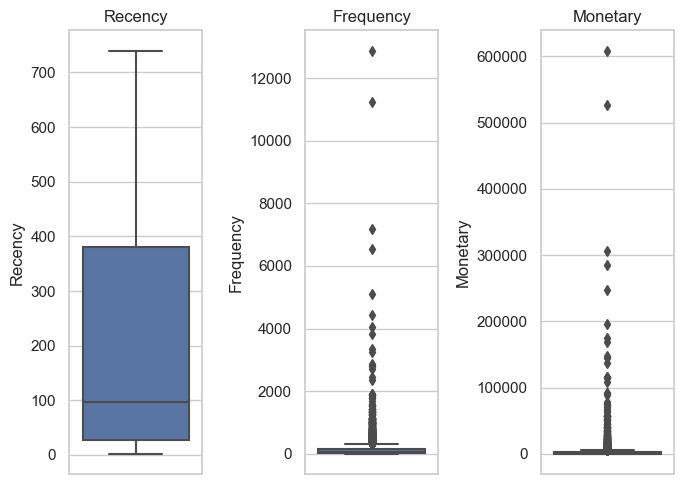

In [15]:
## DETECTING OUTLIERS ##
# Setting the overall aesthetics
sns.set(style="whitegrid")

plt.suptitle('Outliers\n', size = 16)
plt.figure(figsize=(7, 5)) # Smaller figure size

# Plotting boxplot for Recency
plt.subplot(1, 3, 1)
sns.boxplot(y=RFM['Recency'])
plt.title('Recency')

# Plotting boxplot for Frequency
plt.subplot(1, 3, 2)
sns.boxplot(y=RFM['Frequency'])
plt.title('Frequency')

# Plotting boxplot for Monetary
plt.subplot(1, 3, 3)
sns.boxplot(y=RFM['Monetary'])
plt.title('Monetary')

plt.tight_layout()
plt.savefig('/Users/mint/ML CW plots/plot01.png', format='png', dpi=300, bbox_inches='tight')
#plt.show()

## Data preproccessing
- tried robust scaling (not suitable)
- min max scaling will result in 0 values (dont want that)
- normalistion will not help since it will leave negative and zero values

In [16]:
'''
# Scaling data (since the values are really spread out)
from sklearn.preprocessing import RobustScaler

# Assuming 'rfm' is your DataFrame
scaler = RobustScaler()

# Selecting the RFM columns to scale
rfm_scaled = scaler.fit_transform(RFM[['Recency', 'Frequency', 'Monetary']])
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

#  re-add these scaled values back into the original DataFrame
RFM['Recency_scaled'] = rfm_scaled['Recency']
RFM['Frequency_scaled'] = rfm_scaled['Frequency']
RFM['Monetary_scaled'] = rfm_scaled['Monetary']

print(RFM)
'''

"\n# Scaling data (since the values are really spread out)\nfrom sklearn.preprocessing import RobustScaler\n\n# Assuming 'rfm' is your DataFrame\nscaler = RobustScaler()\n\n# Selecting the RFM columns to scale\nrfm_scaled = scaler.fit_transform(RFM[['Recency', 'Frequency', 'Monetary']])\nrfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])\n\n#  re-add these scaled values back into the original DataFrame\nRFM['Recency_scaled'] = rfm_scaled['Recency']\nRFM['Frequency_scaled'] = rfm_scaled['Frequency']\nRFM['Monetary_scaled'] = rfm_scaled['Monetary']\n\nprint(RFM)\n"

In [17]:
'''
#plot the scaled data to determine if it is useful
# the scaling was not useful -> try loging the values instead
plt.figure(figsize=(15, 6))

# Plotting boxplot for Recency
plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_scaled['Recency'])
plt.title('Recency')

# Plotting boxplot for Frequency
plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_scaled['Frequency'])
plt.title('Frequency')

# Plotting boxplot for Monetary
plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_scaled['Monetary'])
plt.title('Monetary')

plt.tight_layout()
plt.savefig('/Users/mint/sample_plot4.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
'''

"\n#plot the scaled data to determine if it is useful\n# the scaling was not useful -> try loging the values instead\nplt.figure(figsize=(15, 6))\n\n# Plotting boxplot for Recency\nplt.subplot(1, 3, 1)\nsns.boxplot(y=rfm_scaled['Recency'])\nplt.title('Recency')\n\n# Plotting boxplot for Frequency\nplt.subplot(1, 3, 2)\nsns.boxplot(y=rfm_scaled['Frequency'])\nplt.title('Frequency')\n\n# Plotting boxplot for Monetary\nplt.subplot(1, 3, 3)\nsns.boxplot(y=rfm_scaled['Monetary'])\nplt.title('Monetary')\n\nplt.tight_layout()\nplt.savefig('/Users/mint/sample_plot4.png', format='png', dpi=300, bbox_inches='tight')\nplt.show()\n"

In [18]:
## Scaling and removing outliers using Log Transformation 
#reduces the impact of outliers by compressing large values more than smaller ones, thereby normalizing the distribution of the data.

RFM['Recency_log'] = np.log1p(RFM['Recency'])
RFM['Frequency_log'] = np.log1p(RFM['Frequency'])
RFM['Monetary_log'] = np.log1p(RFM['Monetary'])

## USING Z-Score mtd to remove outliers
# Calculate the Z-score for each RFM variable
RFM['Recency_z'] = zscore(RFM['Recency_log'])
RFM['Frequency_z'] = zscore(RFM['Frequency_log'])
RFM['Monetary_z'] = zscore(RFM['Monetary_log'])

# Define a threshold for identifying outliers (commonly set to 3 or -3)
threshold = 3

# Remove outliers
RFM_cleaned = RFM[(RFM['Recency_z'].abs() <= threshold) & 
                  (RFM['Frequency_z'].abs() <= threshold) & 
                  (RFM['Monetary_z'].abs() <= threshold)].copy()

print(RFM_cleaned)

      Customer ID  Recency  Frequency  Monetary  Recency_log  Frequency_log  \
1           12347        3        253   5633.32     1.386294       5.537334   
2           12348       76         46   1658.40     4.343805       3.850148   
3           12349       20        172   3678.69     3.044522       5.153292   
4           12350      311         16    294.40     5.743003       2.833213   
5           12351      376         21    300.93     5.932245       3.091042   
...           ...      ...        ...       ...          ...            ...   
5860        18283        5        984   2730.70     1.791759       6.892642   
5861        18284      433         28    461.68     6.073045       3.367296   
5862        18285      662         12    427.00     6.496775       2.564949   
5863        18286      478         67   1296.43     6.171701       4.219508   
5864        18287       44        155   4182.99     3.806662       5.049856   

      Monetary_log  Recency_z  Frequency_z  Monetar

<Figure size 1000x700 with 0 Axes>

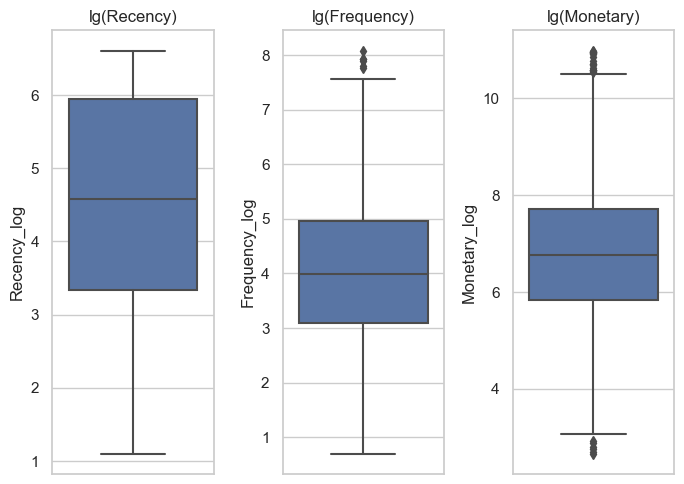

In [19]:
#plot the scaled data to determine if it is useful
plt.suptitle('Outliers after Z-score\n', size = 16)
plt.figure(figsize=(7, 5))
# Plotting boxplot for Recency
plt.subplot(1, 3, 1)
sns.boxplot(y=RFM_cleaned['Recency_log'])
plt.title('lg(Recency)')

# Plotting boxplot for Frequency
plt.subplot(1, 3, 2)
sns.boxplot(y=RFM_cleaned['Frequency_log'])
plt.title('lg(Frequency)')

# Plotting boxplot for Monetary
plt.subplot(1, 3, 3)
sns.boxplot(y=RFM_cleaned['Monetary_log'])
plt.title('lg(Monetary)')

plt.tight_layout()
plt.savefig('/Users/mint/ML CW plots/plot02.png', format='png', dpi=300, bbox_inches='tight')
#plt.show()

In [20]:
# Ensuring model reproducibility

# Set seed for reproducibility
np.random.seed(42)
'''
# Creating a data frame for the values that we want to do the clustering on
rfmlg = RFM_cleaned[['Recency_log', 'Frequency_log', 'Monetary_log']].copy()
print(rfmlg)

# Train-test split
X_train, X_test = train_test_split(rfmlg, test_size=0.2, random_state=42)
'''

"\n# Creating a data frame for the values that we want to do the clustering on\nrfmlg = RFM_cleaned[['Recency_log', 'Frequency_log', 'Monetary_log']].copy()\nprint(rfmlg)\n\n# Train-test split\nX_train, X_test = train_test_split(rfmlg, test_size=0.2, random_state=42)\n"

In [21]:
# Creating a data frame for the values that we want to do the clustering on

rfmlg = RFM_cleaned[['Customer ID', 'Recency_log', 'Frequency_log', 'Monetary_log']].copy()
rfmlg.set_index('Customer ID', inplace=True)
print(rfmlg)

             Recency_log  Frequency_log  Monetary_log
Customer ID                                          
12347           1.386294       5.537334      8.636632
12348           4.343805       3.850148      7.414211
12349           3.044522       5.153292      8.210584
12350           5.743003       2.833213      5.688330
12351           5.932245       3.091042      5.710195
...                  ...            ...           ...
18283           1.791759       6.892642      7.912679
18284           6.073045       3.367296      6.137036
18285           6.496775       2.564949      6.059123
18286           6.171701       4.219508      7.168141
18287           3.806662       5.049856      8.339021

[5824 rows x 3 columns]


## Selecting number of K for K means clustering
1. elbow mtd
2. sillhoute score


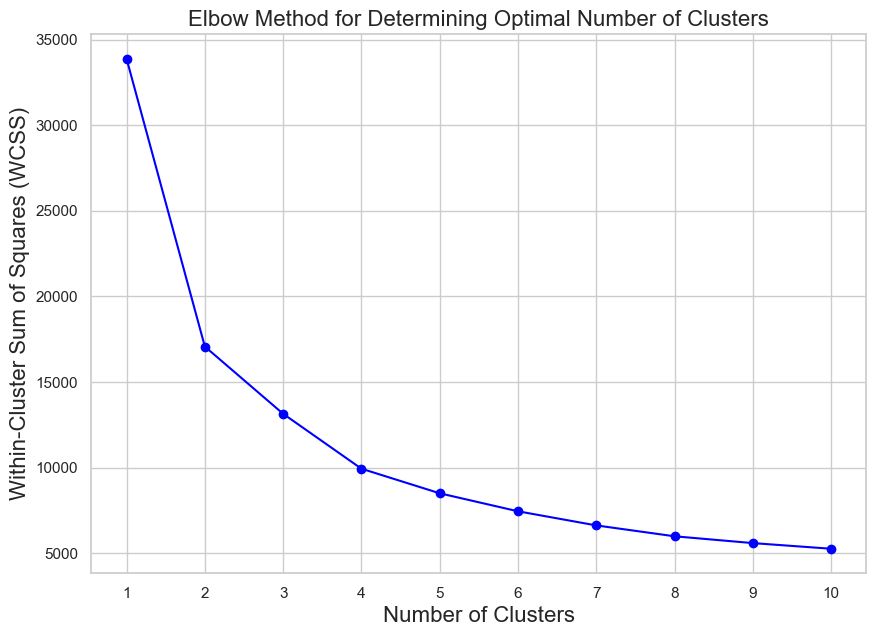

<Figure size 700x500 with 0 Axes>

In [22]:
# Parameters for KMeans
start_k = 1
end_k = 10  # Limit to a maximum of 10 clusters
max_iter = 300
n_init = 10
random_state = 0

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(start_k, end_k + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=max_iter, n_init=n_init, random_state=random_state)
    kmeans.fit(rfmlg)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve to find the optimal 'k'
plt.plot(range(start_k, end_k + 1), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Determining Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=16)
plt.xticks(range(start_k, end_k + 1))  # Ensures that all cluster counts are shown
plt.grid(True)
plt.figure(figsize=(7, 5))
plt.savefig('/Users/mint/ML CW plots/plot03.png', format='png', dpi=300, bbox_inches='tight')

In [23]:
## SILLOUTE PLOT ##
#CREATE A COPY FOR THIS PLOT
df_silhouette = rfmlg.copy()

# Setting variables within the silhouette test
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg_scores = []

print("Silhouette Analysis Results:")

for num_clusters in range_n_clusters:
    # Initialize KMeans with a fixed random_state for reproducibility
    kmeans = KMeans(n_clusters=num_clusters, max_iter=max_iter, random_state=random_state)
    kmeans.fit(df_silhouette)
    
    cluster_labels = kmeans.labels_
    
    # Silhouette score
    silhouette_avg = silhouette_score(df_silhouette, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

Silhouette Analysis Results:


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the silhouette score is 0.41626933546931133


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the silhouette score is 0.31049158293386164


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the silhouette score is 0.3447449188248803


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the silhouette score is 0.30929535059720625


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the silhouette score is 0.3071710637176311


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the silhouette score is 0.289191858404601


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the silhouette score is 0.2930036739792638


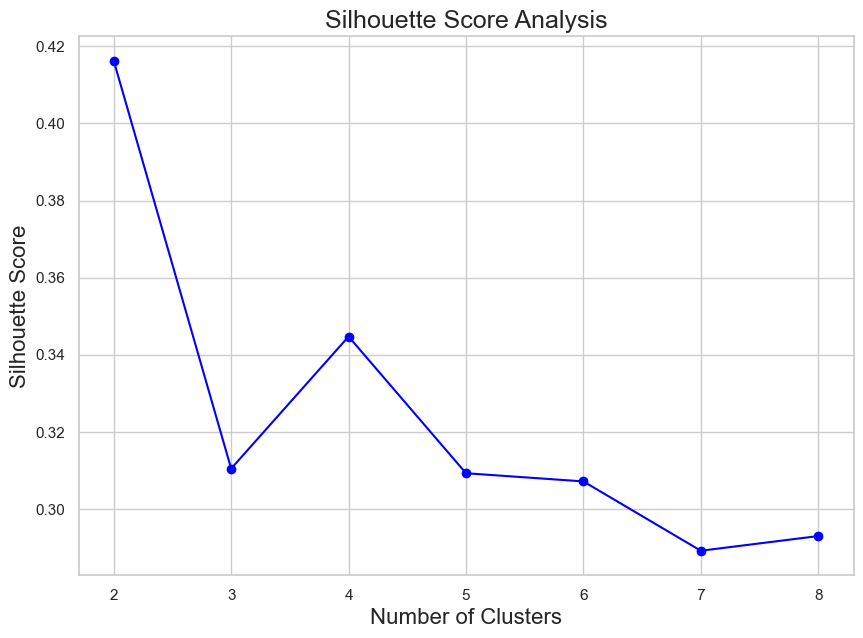

<Figure size 700x500 with 0 Axes>

In [24]:
# Plotting silhouette scores for each number of clusters
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o', linestyle='-', color='blue')
plt.title('Silhouette Score Analysis', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel('Silhouette Score', fontsize=16)
plt.xticks(range_n_clusters)
plt.grid(True)
plt.figure(figsize=(7, 5))
plt.savefig('/Users/mint/ML CW plots/plot04.png', format='png', dpi=300, bbox_inches='tight')

## Clustering model training
in this section we will train the model based on the train set

In [25]:
# Perform KMeans clustering
# Based on the silloutte plot, 4 clusters will be the most suitable option
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=max_iter, n_init=n_init, random_state=random_state) 
cluster_labels = kmeans.fit_predict(rfmlg)

# Add the cluster labels back to  original DataFrame
rfmlg['Cluster'] = cluster_labels

# take a look at the new rfmlg data frame
print(rfmlg)

             Recency_log  Frequency_log  Monetary_log  Cluster
Customer ID                                                   
12347           1.386294       5.537334      8.636632        2
12348           4.343805       3.850148      7.414211        0
12349           3.044522       5.153292      8.210584        2
12350           5.743003       2.833213      5.688330        3
12351           5.932245       3.091042      5.710195        3
...                  ...            ...           ...      ...
18283           1.791759       6.892642      7.912679        2
18284           6.073045       3.367296      6.137036        3
18285           6.496775       2.564949      6.059123        3
18286           6.171701       4.219508      7.168141        0
18287           3.806662       5.049856      8.339021        2

[5824 rows x 4 columns]


In [26]:
# Making colour pallete
color_palette = [
    '#636EFA',  # Blue
    '#EF553B',  # Red
    '#00CC96',  # Mint
    '#FFA15A',  # Orange
]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x700 with 0 Axes>

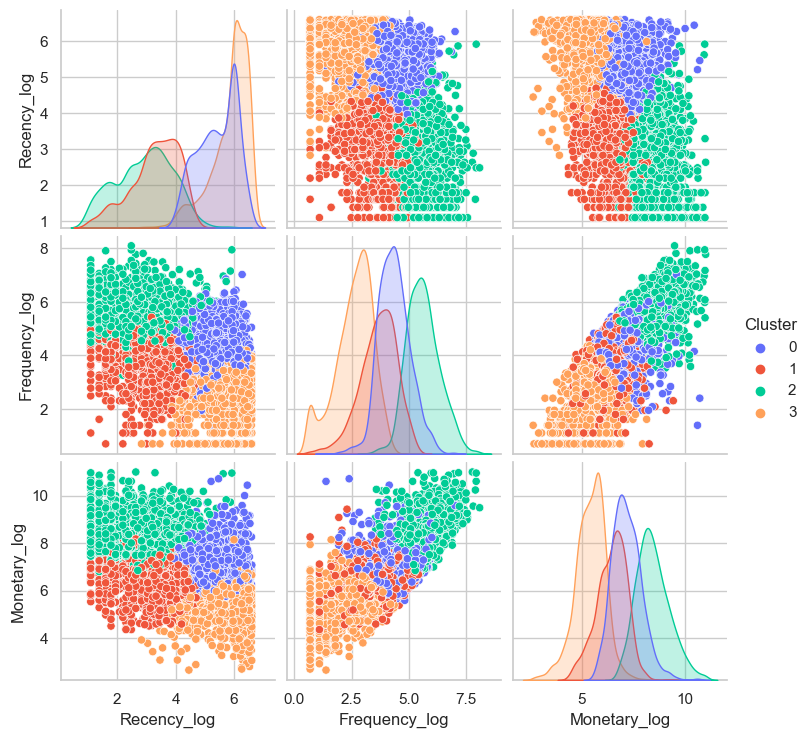

In [27]:
# Creating a df for pairplot
clustering_plot = rfmlg[['Cluster','Recency_log', 'Frequency_log', 'Monetary_log']]

# Pairplot to compare the clusters within 3 features
plt.suptitle("Cluster Pairplot", y=1.02, size=20)
sns.pairplot(clustering_plot, vars=['Recency_log', 'Frequency_log', 'Monetary_log'], hue='Cluster', palette=color_palette)
plt.savefig('/Users/mint/ML CW plots/plot05.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

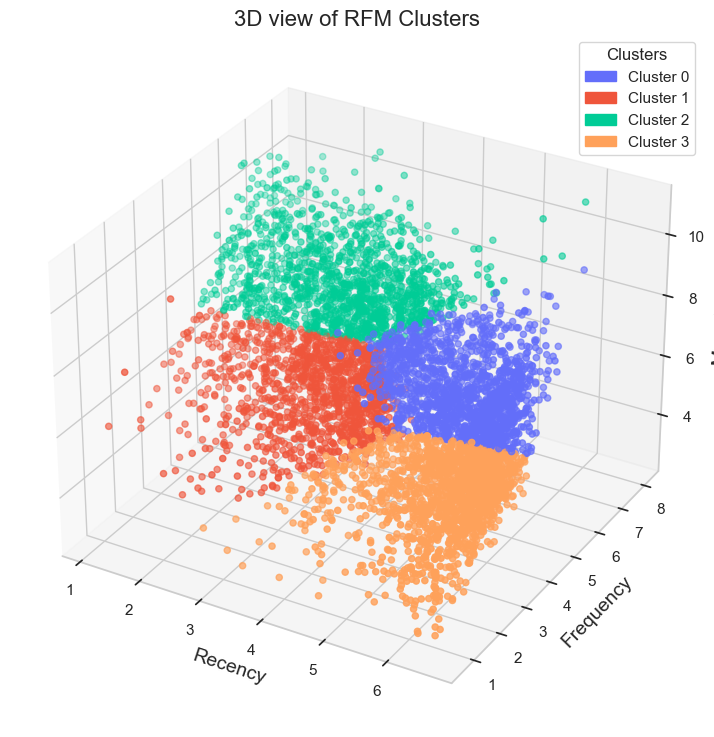

In [28]:
# Plotting a 3D figure to understand the data cluster distribution
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Map cluster labels to colors
colors = clustering_plot['Cluster'].map({i: color_palette[i] for i in range(len(color_palette))})

scatter = ax.scatter(clustering_plot['Recency_log'], clustering_plot['Frequency_log'], clustering_plot['Monetary_log'], c=colors)
ax.set_xlabel('Recency', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_zlabel('Monetary', fontsize=14)
plt.title('3D view of RFM Clusters', fontsize=16)

# Custom legend
legend_patches = [mpatches.Patch(color=color_palette[i], label=f'Cluster {i}') for i in range(len(color_palette))]
plt.legend(handles=legend_patches, title="Clusters")
plt.savefig('/Users/mint/ML CW plots/plot06.png', format='png', dpi=300, bbox_inches='tight')

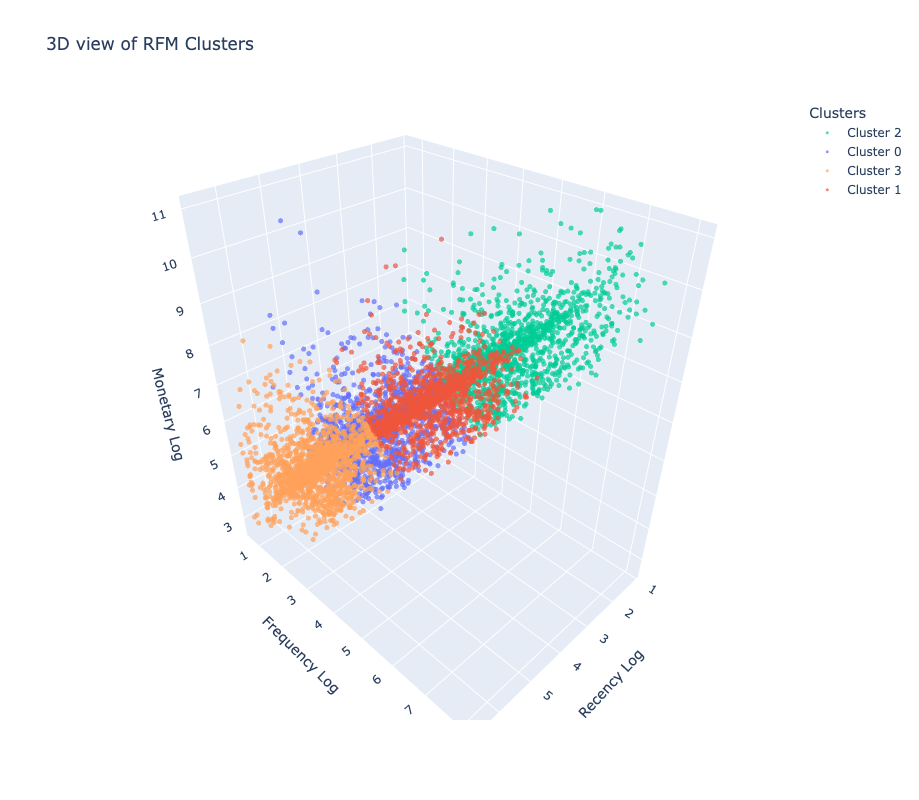

<Figure size 1000x700 with 0 Axes>

In [29]:
# Creating the 3D scatter plot cluster by cluster
fig = go.Figure()

unique_clusters = clustering_plot['Cluster'].unique()

for cluster in unique_clusters:
    cluster_df = clustering_plot[clustering_plot['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_df['Recency_log'],
        y=cluster_df['Frequency_log'],
        z=cluster_df['Monetary_log'],
        mode='markers',
        marker=dict(
            size=3,
            color=color_palette[cluster],  # Directly use the color from the palette
            opacity=0.7
        ),
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    title='3D view of RFM Clusters',
    scene=dict(
        xaxis_title='Recency Log',
        yaxis_title='Frequency Log',
        zaxis_title='Monetary Log'
    ),
    legend_title_text='Clusters',
    width=800,
    height=800
)

fig.show()
plt.savefig('/Users/mint/ML CW plots/plot07.png', format='png', dpi=300, bbox_inches='tight')

## Analysing profiles using RFM scores

In [30]:
# Map RFM attributes to the clusters to see if we can find something new
# RFM score
rfm_score = rfmlg.copy()
rfm_score["RScore"] = pd.qcut(rfmlg['Recency_log'], 5, labels=[5, 4, 3, 2, 1])
rfm_score["FScore"] = pd.qcut(rfmlg["Frequency_log"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]) # Recency: Lower recency means more recent activity, so we invert the scores
rfm_score["MScore"] = pd.qcut(rfmlg['Monetary_log'], 5, labels = [1, 2, 3, 4, 5])

# Combine R and F scores for simplified segment naming
rfm_score['rfm_segment'] = rfm_score['RScore'].astype(str) + rfm_score['FScore'].astype(str)

seg_map = {
    r'[1-2][1-2]': 'Hibernating',       # Low recency and frequency
    r'[1-2][3-4]': 'At Risk',           # Low recency, moderate to high frequency
    r'[1-2]5': 'Can\'t Lose',           # Low recency, very high frequency
    r'3[1-2]': 'About to Sleep',        # Moderate recency, low frequency
    r'33': 'Need Attention',            # Moderate recency and frequency
    r'[3-4][4-5]': 'Loyal Customers',   # Moderate to high recency, high frequency
    r'41': 'Promising',                 # High recency, low frequency
    r'51': 'New Customers',             # Very high recency, low frequency
    r'[4-5][2-3]': 'Potential Loyalists', # High recency, moderate frequency
    r'5[4-5]': 'Champions'              # Very high recency, high frequency
}

rfm_score['rfm_segment'] = rfm_score['rfm_segment'].replace(seg_map, regex=True) # Replace the RF combination with the corresponding segment name using the mapping

# Select and order the final DataFrame columns for display or further analysis
rfm_score = rfm_score[["Recency_log", "Frequency_log", "Monetary_log", "rfm_segment","Cluster"]]

print(rfm_score)

             Recency_log  Frequency_log  Monetary_log      rfm_segment  \
Customer ID                                                              
12347           1.386294       5.537334      8.636632        Champions   
12348           4.343805       3.850148      7.414211   Need Attention   
12349           3.044522       5.153292      8.210584        Champions   
12350           5.743003       2.833213      5.688330      Hibernating   
12351           5.932245       3.091042      5.710195      Hibernating   
...                  ...            ...           ...              ...   
18283           1.791759       6.892642      7.912679        Champions   
18284           6.073045       3.367296      6.137036      Hibernating   
18285           6.496775       2.564949      6.059123      Hibernating   
18286           6.171701       4.219508      7.168141          At Risk   
18287           3.806662       5.049856      8.339021  Loyal Customers   

             Cluster  
Customer ID   

In [31]:
# Add the cluster labels back to  original DataFrame
rfmlg['Segment'] = rfm_score['rfm_segment']

# take a look at the new rfmlg data frame
print(rfmlg)

             Recency_log  Frequency_log  Monetary_log  Cluster  \
Customer ID                                                      
12347           1.386294       5.537334      8.636632        2   
12348           4.343805       3.850148      7.414211        0   
12349           3.044522       5.153292      8.210584        2   
12350           5.743003       2.833213      5.688330        3   
12351           5.932245       3.091042      5.710195        3   
...                  ...            ...           ...      ...   
18283           1.791759       6.892642      7.912679        2   
18284           6.073045       3.367296      6.137036        3   
18285           6.496775       2.564949      6.059123        3   
18286           6.171701       4.219508      7.168141        0   
18287           3.806662       5.049856      8.339021        2   

                     Segment  
Customer ID                   
12347              Champions  
12348         Need Attention  
12349            

Cluster                  0      1      2       3
rfm_segment                                     
About to Sleep        64.0  125.0    0.0   240.0
At Risk              683.0    0.0    0.0   115.0
Can't Lose           109.0    0.0    5.0     0.0
Champions              0.0  106.0  714.0     0.0
Hibernating          145.0    0.0    0.0  1269.0
Loyal Customers      351.0  139.0  620.0     0.0
Need Attention       187.0   71.0    1.0     3.0
New Customers          0.0   78.0    0.0     2.0
Potential Loyalists    4.0  642.0   28.0     0.0
Promising              0.0   93.0    0.0    30.0


<Figure size 900x600 with 0 Axes>

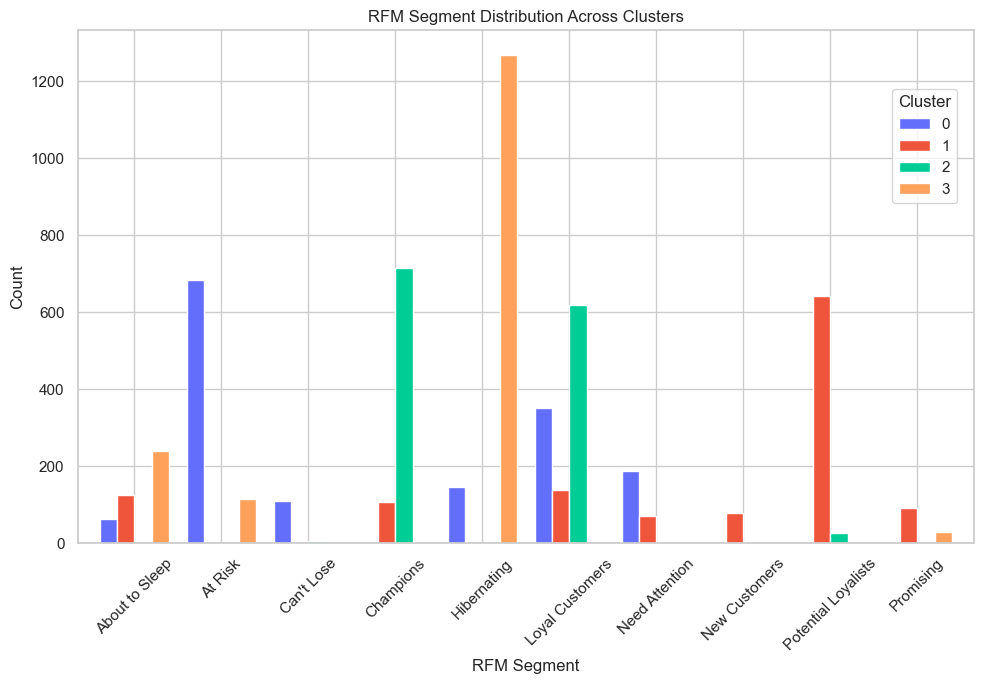

<Figure size 1000x700 with 0 Axes>

In [32]:
# CREATING A PIVOT TABLE TO UNDERSTAND THE SPREAD BETWEEN SEGMENTS AND CLUSTERS
segment_distribution = rfm_score.groupby(['Cluster', 'rfm_segment']).size().reset_index(name='Count')
pivot_table = segment_distribution.pivot(index='rfm_segment', columns='Cluster', values='Count').fillna(0)
print(pivot_table)

fig = plt.figure(figsize=(9, 6))
pivot_table.plot(kind='bar', width=0.8, color=color_palette)
plt.title('RFM Segment Distribution Across Clusters')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(0.9,0.9), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('/Users/mint/ML CW plots/plot08.png', format='png', dpi=300, bbox_inches='tight')

## Validation of cluster
accessing the quality of the clusters

In [33]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

X = rfmlg[['Recency_log', 'Frequency_log', 'Monetary_log']].values

# Compute the silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Compute the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, cluster_labels)
print(f'Davies-Bouldin Index: {davies_bouldin:.3f}')

Silhouette Score: 0.345
Davies-Bouldin Index: 0.941


### Conclusion of the Validation
- consider domain specific implications of the clusters: though the metrics used for the cluster do not provide purely defined cluter segments within the consumers, the cluster are meaningful from a business perspective and business operations can be targeted at different cluster simultanously with the variety of channels available for customer interaction.
- Although the sillhoute score is not close to 1 it is not below 0 or -1 hence we accept the clusters keeping in mind that customer segments may have overalapping dynamics.
- The Davies-Bouldin Index typically ranges from 0 to higher values, with a lower value indicating better clustering. A value of 0.941 is relatively low, which suggests that the clusters have a decent separation and low within-cluster distances. However, this index alone doesn't give an absolute judgment on the quality of the clusters and should be used in conjunction with other metrics.
- If there is a need to dwelve deeper to understand that specific customer needs, RFM segment can be used instead

Finally, it would also be beneficial to look at the data points with negative or low silhouette values to understand their characteristics. Perhaps they are outliers, or maybe they belong to subclusters that the current clustering resolution cannot capture.


# *Classification*

in this section i will do classification based on the factors that we have to classify customers into clusters
1. feature engineering
2. encoding categorical variables
3. scaling variables
4. set seed
5. train - test split
7. choosing a model
8. fitting a model
9. train test split

## Feature engineering
- creating a time frame for the analysis
- map the cluster and the segment from the rfmlg dataframe onto the original DF so that we have all the original features as well
- creating variables for classification (regarding business data, what we can draw from what we already know)
- encode categorical variables

In [34]:
# Ensure 'InvoiceDate' is in datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Find the earliest and latest dates available for analysis
earliest_date = df_cleaned['InvoiceDate'].min()
latest_date = df_cleaned['InvoiceDate'].max()

print(f"Earliest Invoice Date: {earliest_date}")
print(f"Latest Invoice Date: {latest_date}")

# Filter out dates to exclude December 2011 while including December 2009
# Ensures the range is between December 1, 2009, and November 30, 2011
df_cleaned = df_cleaned[(df_cleaned['InvoiceDate'] >= '2009-12-01') & (df_cleaned['InvoiceDate'] < '2011-12-01')]
print(f"Filtered Min Invoice Date: {df_cleaned['InvoiceDate'].min()}")
print(f"Filtered Max Invoice Date: {df_cleaned['InvoiceDate'].max()}")

Earliest Invoice Date: 2009-12-01 07:45:00
Latest Invoice Date: 2011-12-09 12:50:00
Filtered Min Invoice Date: 2009-12-01 07:45:00
Filtered Max Invoice Date: 2011-11-30 17:37:00


/var/folders/xw/9w62z1s15g35lwrgqzm5zq_c0000gn/T/ipykernel_56564/1077563905.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
'''
# map RFM_cleaned onto the original dataset using the merge function
merged_df = pd.merge(df_cleaned, RFM_cleaned[['Customer ID', 'Cluster','Segment']], on='Customer ID', how='left')
df_info(merged_df)'''

"\n# map RFM_cleaned onto the original dataset using the merge function\nmerged_df = pd.merge(df_cleaned, RFM_cleaned[['Customer ID', 'Cluster','Segment']], on='Customer ID', how='left')\ndf_info(merged_df)"

In [36]:
# Merge with additional data
RFM_cleaned_merged = RFM_cleaned.merge(rfmlg, left_on='Customer ID', right_index=True, how='left')
#df_info(RFM_cleaned_merged)

# Merge filtered data with RFM and cluster information
merged_df = pd.merge(df_cleaned, RFM_cleaned_merged[['Customer ID', 'Cluster', 'Segment']], on='Customer ID', how='left')

# Calculate total from 'Quantity' and 'Price' 
merged_df['Total'] = merged_df['Quantity'] * merged_df['Price']

# Removing outliers - drop rows with NaN values and update the dataframe
cleaned_merged_df = merged_df.dropna()

# Summarize the cleaned, merged dataframe
df_info(cleaned_merged_df)

------------ Head ------------
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Year  Cluster  \
0 2009-12-01 07:45:00   6.95        13085  United Kingdom  2009      0.0   
1 2009-12-01 07:45:00   6.75        13085  United Kingdom  2009      0.0   
2 2009-12-01 07:45:00   6.75        13085  United Kingdom  2009      0.0   
3 2009-12-01 07:45:00   2.10        13085  United Kingdom  2009      0.0   
4 2009-12-01 07:45:00   1.25        13085  United Kingdom  2009      0.0   

           Segment  Total  
0  Loyal Customers   83.4  
1  Loyal Customers   81.0  
2  Loya

In [37]:
# Creating a new data frame for the features
classifying_customers = cleaned_merged_df.copy()

classifying_customers['InvoiceDate'] = pd.to_datetime(classifying_customers['InvoiceDate'])

# Convert Invoice_Date to components that can be used in classification
classifying_customers['Year'] = classifying_customers['InvoiceDate'].dt.year
classifying_customers['Month'] = classifying_customers['InvoiceDate'].dt.month
classifying_customers['Day'] = classifying_customers['InvoiceDate'].dt.day

#classifying_customers['InvoiceDate'] = pd.to_datetime(classifying_customers['InvoiceDate'])

# Creating quarters for seasonality analysis
classifying_customers['Quarter'] = classifying_customers['InvoiceDate'].dt.quarter

# Current date for recency calculation: assuming today's date or adjust as necessary
current_date = classifying_customers['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM features
# Recency: Days since last purchase
classifying_customers['Recency'] = (current_date - classifying_customers.groupby('Customer ID')['InvoiceDate'].transform('max')).dt.days

# Frequency: Count of unique invoices per customer
classifying_customers['Frequency'] = classifying_customers.groupby('Customer ID')['Invoice'].transform('nunique')

# Monetary: Total spend per customer
classifying_customers['Monetary'] = classifying_customers.groupby('Customer ID')['Total'].transform('sum')

# Average spent per transaction
classifying_customers['AverageSpentPerTransaction'] = classifying_customers.groupby('Customer ID')['Total'].transform('sum') / classifying_customers['Frequency']

# Total unique items bought by this customer
classifying_customers['TotalUniqueItemsBought'] = classifying_customers.groupby('Customer ID')['StockCode'].transform('nunique')

# Average qty bought by this client per transaction
classifying_customers['AverageQuantityPerTransaction'] = classifying_customers.groupby('Customer ID')['Quantity'].transform('sum') / classifying_customers['Frequency']

# Seasonality of the customer's buying behavior
# For each customer, determine the most frequent quarter they make transactions in
classifying_customers['SeasonalBuying'] = classifying_customers.groupby('Customer ID')['Quarter'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Since we've applied transformations, every row in classifying_customers now has the calculated features.
# To remove duplicates and keep one row per customer with the new features:
classifying_customers.drop_duplicates('Customer ID', inplace=True)

# Selecting columns to view
#columns_to_view = ['Customer ID', 'Recency', 'Frequency', 'Monetary', 'AverageSpentPerTransaction', 'TotalUniqueItemsBought', 'AverageQuantityPerTransaction', 'SeasonalBuying']
#print(classifying_customers[columns_to_view].head())
df_info(classifying_customers)

------------ Head ------------
   Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
12  489436    48173C                DOOR MAT BLACK FLOCK         10   
31  489437     22143    CHRISTMAS CRAFT HEART DECORATIONS         6   
71  489439     22065       CHRISTMAS PUDDING TRINKET POT         12   
89  489440     22350                            CAT BOWL          8   

           InvoiceDate  Price  Customer ID         Country  Year  Cluster  \
0  2009-12-01 07:45:00   6.95        13085  United Kingdom  2009      0.0   
12 2009-12-01 09:06:00   5.95        13078  United Kingdom  2009      2.0   
31 2009-12-01 09:08:00   2.10        15362  United Kingdom  2009      0.0   
71 2009-12-01 09:28:00   1.45        12682          France  2009      2.0   
89 2009-12-01 09:43:00   2.55        18087  United Kingdom  2009      0.0   

    ... Month  Day  Quarter  Recency  Frequency  Monetary  \
0   ...    12    1

In [38]:
classifying_customers = classifying_customers.set_index('InvoiceDate')

In [39]:
df_info(classifying_customers)

------------ Head ------------
                    Invoice StockCode                          Description  \
InvoiceDate                                                                  
2009-12-01 07:45:00  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
2009-12-01 09:06:00  489436    48173C                DOOR MAT BLACK FLOCK    
2009-12-01 09:08:00  489437     22143    CHRISTMAS CRAFT HEART DECORATIONS   
2009-12-01 09:28:00  489439     22065       CHRISTMAS PUDDING TRINKET POT    
2009-12-01 09:43:00  489440     22350                            CAT BOWL    

                     Quantity  Price  Customer ID         Country  Year  \
InvoiceDate                                                               
2009-12-01 07:45:00        12   6.95        13085  United Kingdom  2009   
2009-12-01 09:06:00        10   5.95        13078  United Kingdom  2009   
2009-12-01 09:08:00         6   2.10        15362  United Kingdom  2009   
2009-12-01 09:28:00        12   1.45        126

### Encoding
After doing some trial and error, Binary encoding seems to be the best way to avoid high dimensionality
one hot encoding and dummy encoding ware not suitable for the dataset variable

In [40]:
## Creating a copy of the dataframe to encode the categorical variables and replace the original columns to prevent overlap
encodingdf = classifying_customers.copy()

In [41]:
'''
## one hot encoding for country, cluster and segment 
# Dummy encoding did not work
one_hot_encoded_features = pd.get_dummies(encoding[['Country', 'Cluster', 'Segment']], drop_first=True) 
# drop_first=True parameter is used to avoid multicollinearity

# Concatenate the one-hot encoded columns back to the original DataFrame
classifying_customers_encoded = pd.concat([encoding, one_hot_encoded_features], axis=1)

print(classifying_customers_encoded.head())

## one hot encoding
dummy_encoded = pd.get_dummies(encoding['Country'], drop_first = True, prefix = 'Country')
encoding = pd.concat([encoding, dummy_encoded], axis = 1)
print(encoding.head())

from sklearn.feature_extraction import FeatureHasher
# trying feature hasher
n_features = 10 

# initialising the hasher for each column
hasher_country = FeatureHasher(n_features=n_features, input_type='string')
hasher_cluster = FeatureHasher(n_features=n_features, input_type='string')
hasher_segment = FeatureHasher(n_features=n_features, input_type='string')

# transform the columns using the hasher 
hashed_features_country = hasher_country.transform(encoding[['Country']].astype(str).values)
hashed_features_cluster = hasher_cluster.transform(encoding[['Cluster']].astype(str).values)
hashed_features_segment = hasher_segment.transform(encoding[['Segment']].astype(str).values)

# Convert the hashed features to data frame
hashed_features_country_df = pd.DataFrame(hashed_features_country.toarray(), columns=[f'Country_hashed_{i}' for i in range(n_features)])
hashed_features_cluster_df = pd.DataFrame(hashed_features_cluster.toarray(), columns=[f'Cluster_hashed_{i}' for i in range(n_features)])
hashed_features_segment_df = pd.DataFrame(hashed_features_segment.toarray(), columns=[f'Segment_hashed_{i}' for i in range(n_features)])

#concat the hashed features back into the data frame
encoding_hashed = pd.concat([encoding.reset_index(drop=True), hashed_features_country_df, hashed_features_cluster_df, hashed_features_segment_df], axis=1)

print(encoding_hashed.head())
'''

"\n## one hot encoding for country, cluster and segment \n# Dummy encoding did not work\none_hot_encoded_features = pd.get_dummies(encoding[['Country', 'Cluster', 'Segment']], drop_first=True) \n# drop_first=True parameter is used to avoid multicollinearity\n\n# Concatenate the one-hot encoded columns back to the original DataFrame\nclassifying_customers_encoded = pd.concat([encoding, one_hot_encoded_features], axis=1)\n\nprint(classifying_customers_encoded.head())\n\n## one hot encoding\ndummy_encoded = pd.get_dummies(encoding['Country'], drop_first = True, prefix = 'Country')\nencoding = pd.concat([encoding, dummy_encoded], axis = 1)\nprint(encoding.head())\n\nfrom sklearn.feature_extraction import FeatureHasher\n# trying feature hasher\nn_features = 10 \n\n# initialising the hasher for each column\nhasher_country = FeatureHasher(n_features=n_features, input_type='string')\nhasher_cluster = FeatureHasher(n_features=n_features, input_type='string')\nhasher_segment = FeatureHasher(n_fe

In [42]:
# Encoding for country
country_occurrences = encodingdf['Country'].value_counts()
print(country_occurrences)

Country
United Kingdom          5280
Germany                  106
France                    92
Spain                     38
Belgium                   27
Portugal                  24
Switzerland               21
Netherlands               21
Sweden                    19
Italy                     17
Australia                 13
Finland                   13
Channel Islands           13
Norway                    12
Austria                   12
Denmark                   10
Japan                     10
Cyprus                     9
USA                        7
Poland                     6
Unspecified                6
Canada                     5
United Arab Emirates       4
Israel                     4
Greece                     4
EIRE                       3
RSA                        2
Bahrain                    2
Malta                      2
Korea                      2
Brazil                     2
Singapore                  1
Thailand                   1
Lithuania                  1
West I

In [43]:
## Binary encoding to prevent high dimensionality

# Ensure Seasonal buying is alreay a numeric case before encoding
encodingdf['SeasonalBuying'] = encodingdf['SeasonalBuying'].astype(int).apply(lambda x: format(x, '02b'))

'''
# Ensure 'Cluster' is treated as an integer and then apply binary encoding
# The 'Cluster' values should also be in an appropriate numeric range that makes sense for binary encoding
encodingdf['Cluster'] = encodingdf['Cluster'].apply(lambda x: format(int(float(x)), '02b'))
'''
# Encoding 'Segment' using a mapping to numeric values, then applying binary encoding
# We need 4 bits to represent numbers 0-10 in binary.
Segment_map = {
    'Hibernating': 0, 'At Risk': 1, 'Can\'t Lose': 2, 'About to Sleep': 3, 
    'Need Attention': 4, 'Loyal Customers': 5, 'Promising': 6, 'New Customers': 7, 
    'Potential Loyalists': 8, 'Champions': 9
}
encodingdf['Segment'] = encodingdf['Segment'].map(Segment_map)
# apply binary encoding
encodingdf['Segment'] = encodingdf['Segment'].apply(lambda x: format(x, '04b'))

# Encoding the country column
# keep only top 10 countries
top_10_countries = encodingdf['Country'].value_counts().nlargest(10).index.tolist()
# map all other countries as "Others"
country_codes = {country: idx for idx, country in enumerate(top_10_countries)}
country_codes.update({country: 10 for country in encodingdf['Country'] if country not in top_10_countries})
# Map the countries to their new codes
encodingdf['Country_Code'] = encodingdf['Country'].map(country_codes)
# Convert the country codes into binary strings. We need 4 bits to represent numbers 0-10 in binary.
encodingdf['Country_Binary'] = encodingdf['Country_Code'].apply(lambda x: format(x, '04b'))

# check th3 results 
df_info(encodingdf)

------------ Head ------------
                    Invoice StockCode                          Description  \
InvoiceDate                                                                  
2009-12-01 07:45:00  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
2009-12-01 09:06:00  489436    48173C                DOOR MAT BLACK FLOCK    
2009-12-01 09:08:00  489437     22143    CHRISTMAS CRAFT HEART DECORATIONS   
2009-12-01 09:28:00  489439     22065       CHRISTMAS PUDDING TRINKET POT    
2009-12-01 09:43:00  489440     22350                            CAT BOWL    

                     Quantity  Price  Customer ID         Country  Year  \
InvoiceDate                                                               
2009-12-01 07:45:00        12   6.95        13085  United Kingdom  2009   
2009-12-01 09:06:00        10   5.95        13078  United Kingdom  2009   
2009-12-01 09:08:00         6   2.10        15362  United Kingdom  2009   
2009-12-01 09:28:00        12   1.45        126

## Scale the variables
since we already removed the outliers this step is purely for scaling all the variables so that they dont disprportionally affect the model. 
in the case where we have many variables and we dont need to allocate weights to the different variables unlike for RFM, it is useful to use standard scaler 

In [44]:
scalingdf = encodingdf.copy()

### Min Max Scaling

In [45]:
## Scaling the variables that will be included in the classification model
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() # creating an instance of the class object

columns_to_scale = ['Quantity', 'Price', 'Recency', 'Frequency', 'Monetary', 'AverageQuantityPerTransaction', 'TotalUniqueItemsBought']
scalingdf[columns_to_scale]= scaler.fit_transform(scalingdf[columns_to_scale])#fit and transform the MinMaxScalar into the data frame 
print(scalingdf)

                    Invoice StockCode                          Description  \
InvoiceDate                                                                  
2009-12-01 07:45:00  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
2009-12-01 09:06:00  489436    48173C                DOOR MAT BLACK FLOCK    
2009-12-01 09:08:00  489437     22143    CHRISTMAS CRAFT HEART DECORATIONS   
2009-12-01 09:28:00  489439     22065       CHRISTMAS PUDDING TRINKET POT    
2009-12-01 09:43:00  489440     22350                            CAT BOWL    
...                     ...       ...                                  ...   
2011-11-29 15:09:00  579472     23535              WALL ART BICYCLE SAFETY   
2011-11-29 15:39:00  579497     22869         NUMBER TILE COTTAGE GARDEN 1   
2011-11-30 12:38:00  579671     21615  4 LAVENDER BOTANICAL DINNER CANDLES   
2011-11-30 14:03:00  579690     22485        SET OF 2 WOODEN MARKET CRATES   
2011-11-30 14:52:00  579754     22941         CHRISTMAS LIGHTS 1

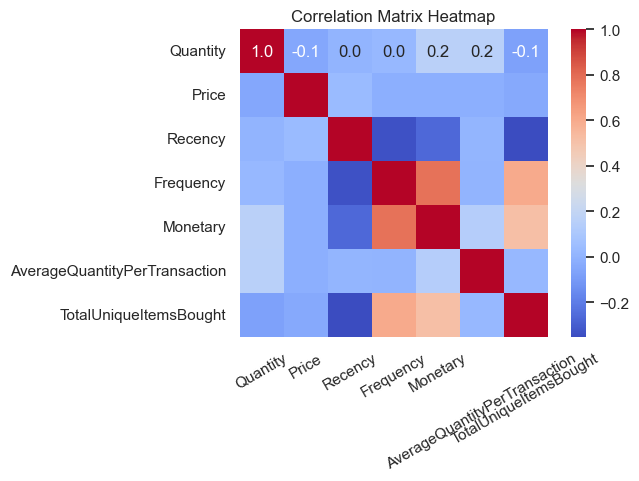

<Figure size 1000x700 with 0 Axes>

In [46]:
# Corr plot for min max scaler
corr_matrix = scalingdf[columns_to_scale].corr()
scalingdf[columns_to_scale] = scalingdf[columns_to_scale].apply(pd.to_numeric, errors='coerce')

# Plot the heatmap
fig = plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=30)
plt.show()
plt.savefig('/Users/mint/ML CW plots/plot09.png', format='png', dpi=300, bbox_inches='tight')

In [47]:
## check for collinearity among the varaiables by calculating the Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant for the intercept
X = add_constant(scalingdf[columns_to_scale])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

## VIF of 1 to 5 suggests moderate correlation but its often not high enough for concern

                         feature       VIF
0                          const  3.817104
1                       Quantity  1.093475
2                          Price  1.005529
3                        Recency  1.176468
4                      Frequency  3.086623
5                       Monetary  2.842325
6  AverageQuantityPerTransaction  1.067959
7         TotalUniqueItemsBought  1.679188


### Standard Scaling

In [48]:
'''
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Initialize the StandardScaler
scaler = StandardScaler()

columns_to_scale = ['Quantity', 'Price', 'Recency', 'Frequency', 'Monetary',
                    'AverageQuantityPerTransaction', 'TotalUniqueItemsBought']

# Fit and transform the StandardScaler to the DataFrame
scalingdf[columns_to_scale] = scaler.fit_transform(scalingdf[columns_to_scale])

# Printing the first few rows to inspect the scaled data
print(scalingdf.head())

# Creating a correlation matrix for the scaled variables
corr_matrix = scalingdf[columns_to_scale].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()
'''

'\nfrom sklearn.preprocessing import StandardScaler\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\nfrom statsmodels.tools.tools import add_constant\n\n# Initialize the StandardScaler\nscaler = StandardScaler()\n\ncolumns_to_scale = [\'Quantity\', \'Price\', \'Recency\', \'Frequency\', \'Monetary\',\n                    \'AverageQuantityPerTransaction\', \'TotalUniqueItemsBought\']\n\n# Fit and transform the StandardScaler to the DataFrame\nscalingdf[columns_to_scale] = scaler.fit_transform(scalingdf[columns_to_scale])\n\n# Printing the first few rows to inspect the scaled data\nprint(scalingdf.head())\n\n# Creating a correlation matrix for the scaled variables\ncorr_matrix = scalingdf[columns_to_scale].corr()\n\n# Plotting the heatmap for the correlation matrix\nplt.figure(figsize=(10, 8))\nsns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap=\'coolwarm\', cbar=True, square=True)\nplt.title(\'Correlation Matrix Heatmap\')\nplt.xticks(rotation=45)\nplt.ytic

### Robust scaling

In [49]:
'''
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Initialize the RobustScaler
scaler = RobustScaler()
columns_to_scale = ['Quantity', 'Price', 'Recency', 'Frequency', 'Monetary',
                    'AverageQuantityPerTransaction', 'TotalUniqueItemsBought']

# Fit and transform the RobustScaler to the DataFrame
scalingdf[columns_to_scale] = scaler.fit_transform(scalingdf[columns_to_scale])

# Printing the first few rows to inspect the scaled data
print(scalingdf.head())

# Creating a correlation matrix for the scaled variables
corr_matrix = scalingdf[columns_to_scale].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()
'''

'\nfrom sklearn.preprocessing import RobustScaler\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\nfrom statsmodels.tools.tools import add_constant\n\n# Initialize the RobustScaler\nscaler = RobustScaler()\ncolumns_to_scale = [\'Quantity\', \'Price\', \'Recency\', \'Frequency\', \'Monetary\',\n                    \'AverageQuantityPerTransaction\', \'TotalUniqueItemsBought\']\n\n# Fit and transform the RobustScaler to the DataFrame\nscalingdf[columns_to_scale] = scaler.fit_transform(scalingdf[columns_to_scale])\n\n# Printing the first few rows to inspect the scaled data\nprint(scalingdf.head())\n\n# Creating a correlation matrix for the scaled variables\ncorr_matrix = scalingdf[columns_to_scale].corr()\n\n# Plotting the heatmap for the correlation matrix\nplt.figure(figsize=(10, 8))\nsns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap=\'coolwarm\', cbar=True, square=True)\nplt.title(\'Correlation Matrix Heatmap\')\nplt.xticks(rotation=45)\nplt.yticks(rotatio

### Preparing a dataframe for classification

In [50]:
## removing the alphebets from the stock code column and converting it to a float
scalingdf['StockCode'] = scalingdf['StockCode'].str.replace('[^\d.]', '', regex=True)
scalingdf['StockCode'] = pd.to_numeric(scalingdf['StockCode'], errors='coerce')

## removing NaNs in the dataset 
scalingdf = scalingdf.dropna(subset=['StockCode'])

## Creating a df for classification modeling
columns_to_exclude = ['Customer ID', 'YearMonth', 'Description', 'Invoice_Date', 'Invoice', 'Total','Country','Country_Code']
modeling_df = scalingdf.loc[:, ~scalingdf.columns.isin(columns_to_exclude)]

## checking if the remaining cols in the dataframe are appropriate
modeling_df.info()
df_info(modeling_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5782 entries, 2009-12-01 07:45:00 to 2011-11-30 14:52:00
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   StockCode                      5782 non-null   float64
 1   Quantity                       5782 non-null   float64
 2   Price                          5782 non-null   float64
 3   Year                           5782 non-null   int32  
 4   Cluster                        5782 non-null   float64
 5   Segment                        5782 non-null   object 
 6   Month                          5782 non-null   int32  
 7   Day                            5782 non-null   int32  
 8   Quarter                        5782 non-null   int32  
 9   Recency                        5782 non-null   float64
 10  Frequency                      5782 non-null   float64
 11  Monetary                       5782 non-null   float64
 12  AverageSpent

In [51]:
# Splitting the data set into training and test sets
from sklearn.model_selection import train_test_split

X = modeling_df.drop('Cluster', axis=1)
y = modeling_df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of the original dataset 
print("Original dataset shape:", modeling_df.shape)
# showing the row in the training dataset by grouping X and y train together
print("Training set shape:", (X_train.shape[0], y_train.shape[0]))
# shwoing the rows in the test dataset by grouping X and y test together
print("Test set shape:", (X_test.shape[0], y_test.shape[0]))

Original dataset shape: (5782, 17)
Training set shape: (4625, 4625)
Test set shape: (1157, 1157)


In [52]:
print("NaN in X_train:", X_train.isna().any().any())
print("NaN in X_test:", X_test.isna().any().any())
print("NaN in y_train:", y_train.isna().any())
print("NaN in y_test:", y_test.isna().any())

NaN in X_train: False
NaN in X_test: False
NaN in y_train: False
NaN in y_test: False


## Classification models
in this section we will be exploring and evaluationg classification models

In [53]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# initiallising models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='saga'),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

# make a function to train and evaluate the models 
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))

# training and evaluating each model
train_and_evaluate(models, X_train, y_train, X_test, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Logistic Regression Accuracy: 0.5765
Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.58      0.54       319
         1.0       0.57      0.45      0.50       232
         2.0       0.74      0.33      0.46       279
         3.0       0.59      0.87      0.70       327

    accuracy                           0.58      1157
   macro avg       0.60      0.56      0.55      1157
weighted avg       0.60      0.58      0.56      1157

Random Forest Accuracy: 0.9576
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       319
         1.0       0.92      0.96      0.94       232
         2.0       0.96      0.96      0.96       279
         3.0       0.97      0.97      0.97       327

    accuracy                           0.96      1157
   macro avg       0.96      0.96      0.96      1157
weighted avg       0.96      0.96      0.96      1157

SVM Accuracy: 0.

### Understanding Classification metrics
evaluate the performance on the test set, providing a solid foundation for comparing the effectiveness of different classifiers for our classification task 

explanation of what the scores represent:
Precision = TP / (TP + FP)

Recall = TP / (TP + FN) (the ratio of correctly predicted positive observations to all observations in the actual calss >> high recall indicates a low rate of false negatives)

F1 Score = 2(Recall * Precision) / (Recall + Precision)*

Support: Support is the number of actual occurrences of the class in the specified dataset. It's useful for identifying the distribution of classes within the dataset.

Macro Average: Averages the metric independently for each class and then takes the average. This treats all classes equally, regardless of their support.

Weighted Average: Averages the metric for each class, weighted by the number of instances in each class. This accounts for class imbalance.

### Results evaluation
- Log Reg: Moderate performance, with particular weakness in recognizing class 2.
- Random Forest: Excellent performance, well-balanced across classes. The high variability in model performance might suggest overfitting in some folds of the cross-validation.
- SVM: Poor performance, heavily biased towards class 3. The model is likely not suitable in its current form without significant parameter tuning or preprocessing improvements.
- NN:Fair performance, with room for improvement, especially in precision for classes 0 and 1.
- Gradient Boosting: looks like the best performance. well balanced accross all classes with high recall and precision
- Naive Bayes: Moderate performance with substantial room for improvement in balancing class recognition, especially for class 2.

Cluster 3 seems to be the easiest to identify (the variables that we used are good at finding the clusters that are not good for the business is there anything we can do to make the model better at identifying exeptional customers instead? maybe i shouldn't have removed the outliers) 

Gradient Boosting Classifier and Random Forest Model out-perfomr other models by significant margins accross all metrics. good generalizability accross the variables

In [54]:
## Cross Validation scores that will help us find the best model for the classification
from sklearn.model_selection import cross_val_score

# function for cross validation
def train_and_evaluate_with_cv(models, X, y, cv=5):
    model_names = []
    model_scores = []
    model_stddevs = []

    for name, model in models.items():
        # Use cross-validation to get scores
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        model_names.append(name)
        model_scores.append(np.mean(scores))
        model_stddevs.append(np.std(scores))
        
        print(f"{name} - CV Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

    return model_names, model_scores, model_stddevs

model_names, model_scores, model_stddevs = train_and_evaluate_with_cv(models, X, y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Logistic Regression - CV Accuracy: 0.5690 (+/- 0.0235)
Random Forest - CV Accuracy: 0.8592 (+/- 0.1302)
SVM - CV Accuracy: 0.2862 (+/- 0.0007)
Nearest Neighbors - CV Accuracy: 0.5514 (+/- 0.0163)
Gradient Boosting Classifier - CV Accuracy: 0.9165 (+/- 0.0634)
Naive Bayes - CV Accuracy: 0.5649 (+/- 0.0538)


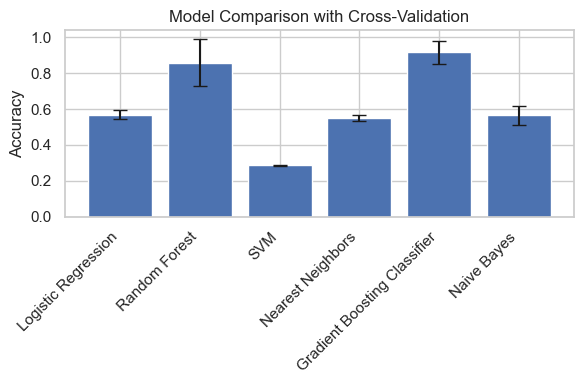

<Figure size 1000x700 with 0 Axes>

In [55]:
# Visualization of cross validation scores
fig = plt.figure(figsize=(6, 4))
plt.bar(model_names, model_scores, yerr=model_stddevs, capsize=5)
plt.ylabel('Accuracy')
plt.title('Model Comparison with Cross-Validation')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()
plt.savefig('/Users/mint/ML CW plots/plot09.png', format='png', dpi=300, bbox_inches='tight')

### Evaluating the models
from the SV scores, it can be observed
- **Logistic Regression** and **Naive Bayes** show moderate average accuracies with low variability, suggesting these models are relatively stable but not as effective as some others.
- **SVM** has the lowest mean accuracy with very low variability, indicating that while its performance is consistent across different folds, it is consistently underperforming.
- **Nearest Neighbors** has a moderate mean accuracy with low variability, similar to Logistic Regression and Naive Bayes, indicating stable but not outstanding performance.
- **Random Forest** shows high mean accuracy but also high variability, suggesting it could be very effective on certain data splits but less so on others.
- **Gradient Boosting Classifier** not only has the highest mean accuracy but also a moderate level of variability. This suggests it is the most effective model overall but might still show some variation in performance depending on the data split.


When we are selecting a model, based on accuracy score and variability, the Gradient Boosting Classifier seems to be the best model based on these scores, offering a strong balance of high effectiveness and moderate consistency.

# *Regression*
Upon identifying consumer clusters and developing a classification model to accurately allocate customers to these clusters, businesses are poised to refine their operations and engagement strategies to better serve and retain their clientele, directly aligning with strategic business goals. This strategic adjustment, grounded in a nuanced understanding of customer segmentation, necessitates an evaluation of its potential repercussions on sales and demand patterns—information pivotal for crafting detailed business plans and allocating budgets for upcoming quarters. In this vein, regression modeling emerges as a critical analytical tool, offering the foresight needed to predict shifts in sales trends based on historical data and established patterns of consumer behavior, all without the requirement for acquiring additional variables. This approach not only streamlines the decision-making process but also ensures that business strategies are anticipatory and molded by a data-informed outlook on future market conditions, thereby enhancing the accuracy and relevance of business operations in the face of evolving market dynamics.

the following steps will be taken for regression sales forecasting
1. Preliminary Analysis
   - visualise sales over time
   - decompose time series

2. feature engineering
   - include time features that will capture the aspect of seasonality
   - lag features (for forecasting)
   
3. model selection
   - baseline model: simple linear regrssion model with time features
       - random forest
       - gradient boosting
       - ARIMA: (AutoRegressive Integrated Moving Average) for a model that specifically leverages time series properties >> no ARIMA as it takes too long 
       - SARIMA

4. model training and validation
   - time series CV
   - parameter tuning
       - grid search
       - random search

6. model interpretation and application
   - forecasting: using the model to make forecast for future sales

7. iteration
   - refine models
   - possible to add new features
   - try new models
   - adjusting model params
  
   - cont validation: when more sales data is captured. continually validate and adjust the model to maintain accuracy

In [56]:
## creating a data frame for regression features
reggressiondf = cleaned_merged_df.copy()
print(reggressiondf)

# make date features
reggressiondf['InvoiceDate'] = pd.to_datetime(reggressiondf['InvoiceDate'])

# Convert Invoice_Date to components that can be used in regression
reggressiondf['Year'] = reggressiondf['InvoiceDate'].dt.year
reggressiondf['Month'] = reggressiondf['InvoiceDate'].dt.month
reggressiondf['Day'] = reggressiondf['InvoiceDate'].dt.day

# Creating quarters for seasonality analysis
reggressiondf['Quarter'] = reggressiondf['InvoiceDate'].dt.quarter

# Current date
current_date = reggressiondf['InvoiceDate'].max() + pd.Timedelta(days=1)

df_info(reggressiondf)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
785745  579885    85034C          3 ROSE MORRIS BOXED CANDLES         4   
785746  579885     21742          LARGE ROUND WICKER PLATTER          2   
785747  579885     23084                   RABBIT NIGHT LIGHT         6   
785748  579885     21257          VICTORIAN SEWING BOX MEDIUM         1   
785749  579885     21259          VICTORIAN SEWING BOX SMALL          1   

               InvoiceDate  Price  Customer ID         Country  Year  Cluster  \
0      2009-12-01 

In [57]:
# set index as date time
reggressiondf = reggressiondf.set_index('InvoiceDate')

### Preliminary Analysis

<Figure size 1000x700 with 0 Axes>

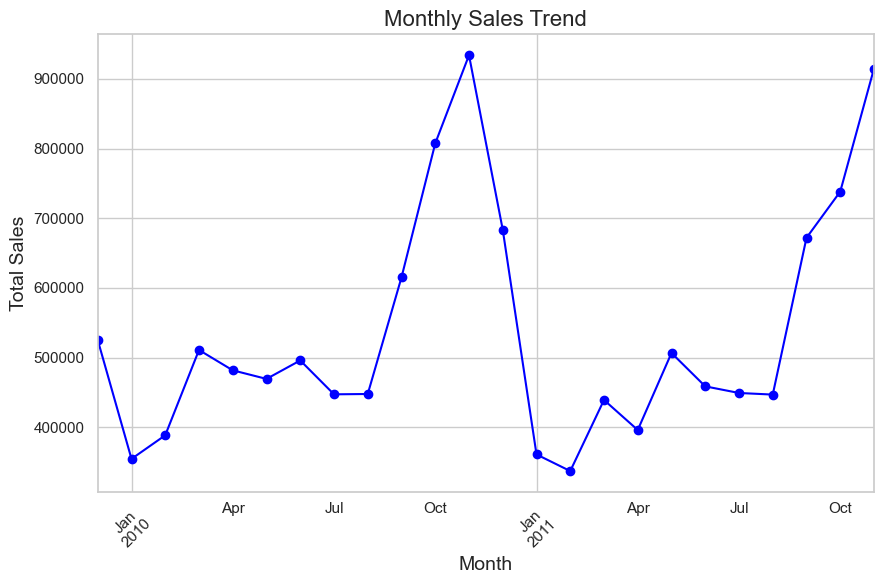

In [58]:
## Plot monthly sales trend
# Aggregating total sales by month('M') using the dt function
monthly_sales = reggressiondf.resample('M')['Total'].sum()

# Plotting the monthly sales trend
plt.figure()
fig = plt.figure(figsize=(9, 6))
monthly_sales.plot(marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 900x600 with 0 Axes>

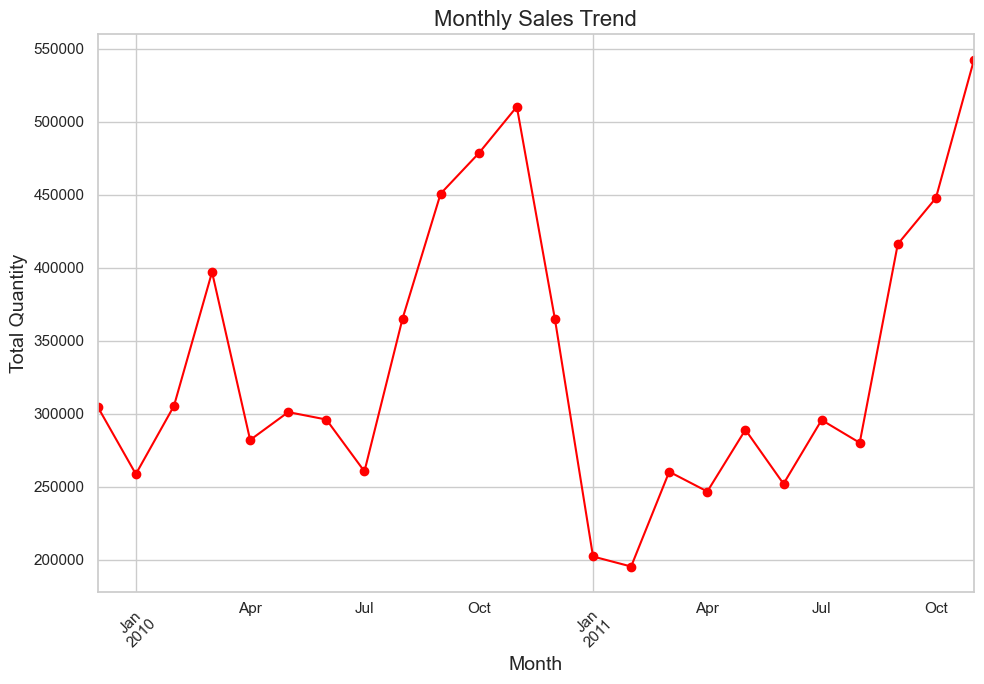

In [59]:
## Plot monthly qty trend
# Aggregating total sales by month('M') using the dt function
monthly_qty = reggressiondf.resample('M')['Quantity'].sum()

# Plotting the monthly sales trend
fig = plt.figure(figsize=(9, 6))
plt.figure()
monthly_qty.plot(marker='o', linestyle='-', color='red')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

it appears that there is an apparent trend where the sales total at the end of the year is always higher than at the start of the year, and fall back down in january. some dips in apr and july happen as a yearly phenomenom too.

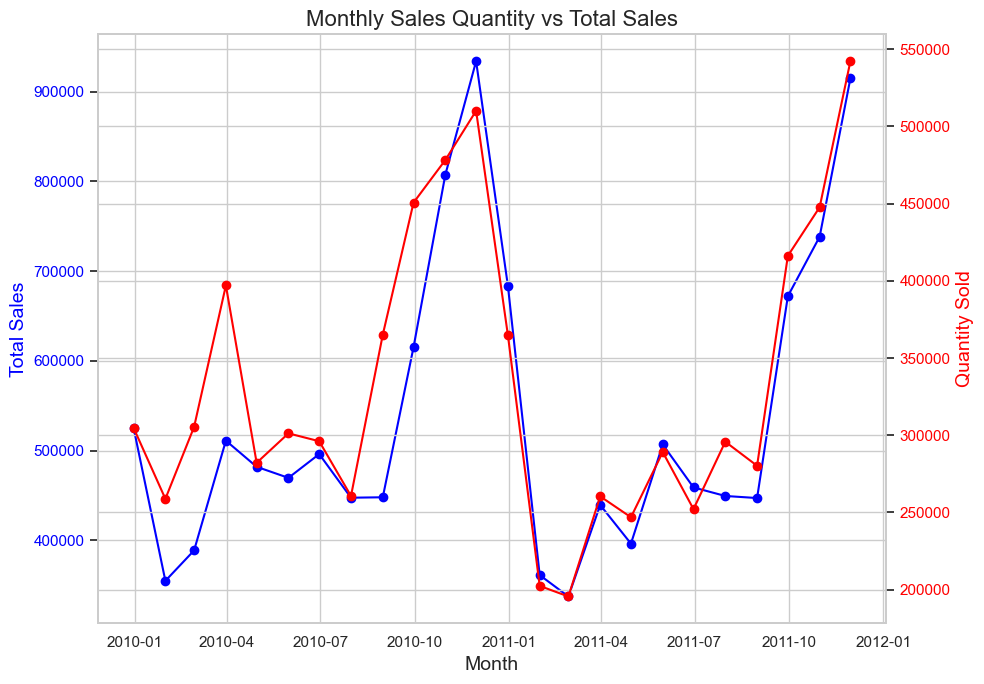

In [60]:
## plot qty on sales 
import matplotlib.colors as mcolors
# Aggregate sales quantity and total sales and qty by month
monthly_data = reggressiondf.resample('M').agg({'Quantity': 'sum', 'Total': 'sum'})

# Plotting both metrics on the same graph but with two different y-axes
fig, ax1 = plt.subplots()

# First axis for the total sales amount
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Total Sales', color='blue', fontsize=14)
ax1.plot(monthly_data.index, monthly_data['Total'], color='blue', marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.set_ylabel('Quantity Sold', color='red', fontsize=14)  
ax2.plot(monthly_data.index, monthly_data['Quantity'], color='red', marker='o', linestyle='-')
ax2.tick_params(axis='y', labelcolor='red')

# Title and other configurations
plt.title('Monthly Sales Quantity vs Total Sales', fontsize=16)
fig.tight_layout()  
plt.show()

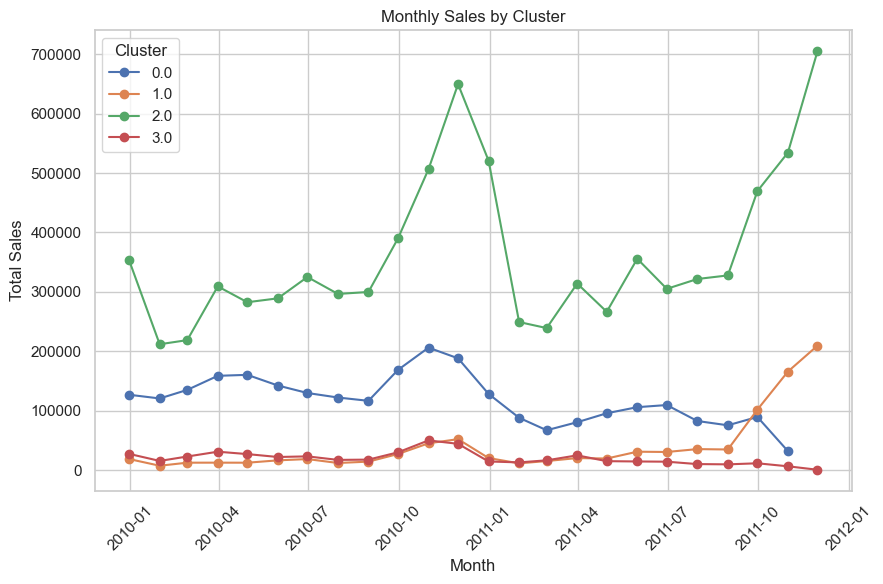

In [61]:
## sales trend by cluster
# We group by month and cluster, then sum the sales, and finally unstack the clusters for individual lines
reggressiondf.index = pd.to_datetime(reggressiondf.index)
monthly_sales_by_cluster = reggressiondf.groupby([pd.Grouper(freq='M'), 'Cluster'])['Total'].sum().unstack()

# Now we plot each cluster's sales over time as separate lines
plt.figure(figsize=(9,6))  # Making the figure smaller than the default

for cluster in monthly_sales_by_cluster.columns:
    plt.plot(monthly_sales_by_cluster.index, monthly_sales_by_cluster[cluster], marker='o', linestyle='-', label=cluster)

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales by Cluster')
plt.legend(title='Cluster')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot parameters to give some paddingplt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



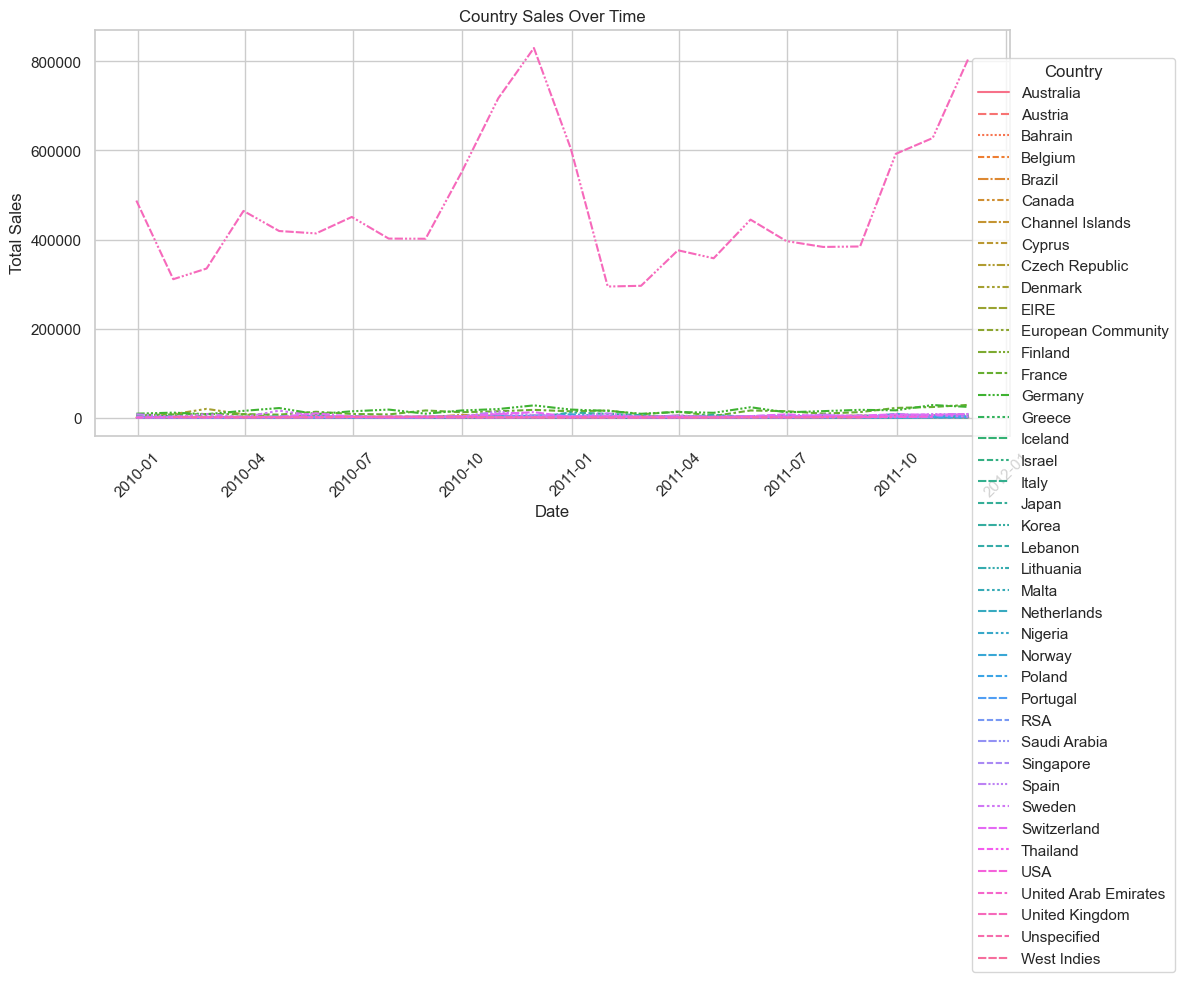

In [62]:
# Aggregate total sales by country and month
sales_over_time = reggressiondf.resample('M')['Total'].sum()

# For visualizing sales of each country separately, we need to group by country as well
country_sales_over_time = reggressiondf.groupby([pd.Grouper(freq='M'), 'Country'])['Total'].sum().unstack()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=country_sales_over_time)
plt.title('Country Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) # Rotate date labels for better readability
plt.legend(title='Country', bbox_to_anchor=(0.95, 0.95), loc='upper left')
plt.tight_layout() # Adjust layout to make room for the rotated date labels and legend
plt.show()

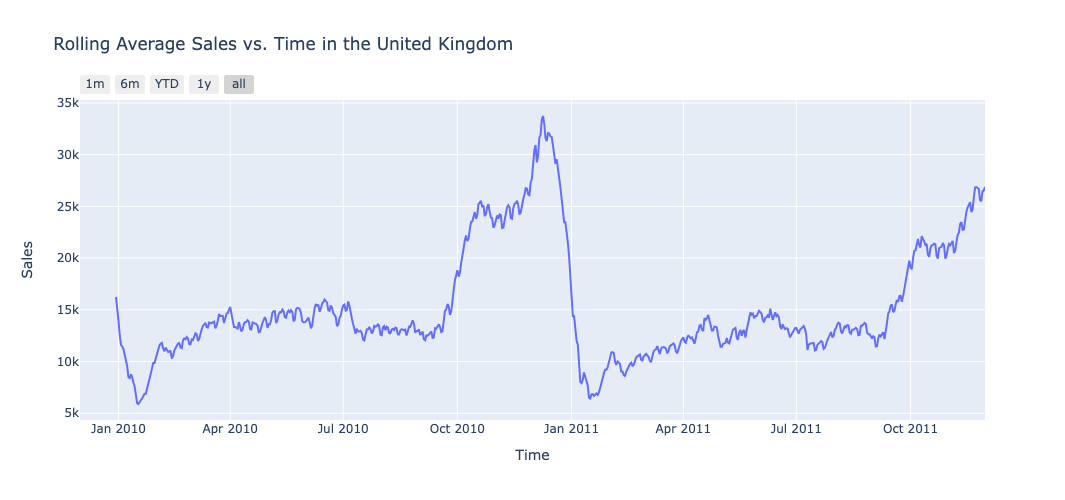

In [63]:
# sales predominantly comes from the UK, so lets focus on forecasting for UK 
# rolling averages for time series data
# Filter the DataFrame for the "United Kingdom"
uk_data = reggressiondf[reggressiondf['Country'] == "United Kingdom"]

# Resample by day/month/year as needed and sum up the Total sales
# Here, we choose monthly ('M') resampling for illustration. 
data = uk_data.resample('D')['Total'].sum().rolling(window=30).mean() #set the rolling window to 90 days 

# Create a figure and add a trace for the "United Kingdom"
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name="United Kingdom"))

# Update layout
fig.update_layout(
    yaxis_title="Sales",
    xaxis_title="Time",
    title="Rolling Average Sales vs. Time in the United Kingdom",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        type="date"
    ),
    width = 700,
    height = 500
)

fig.show()

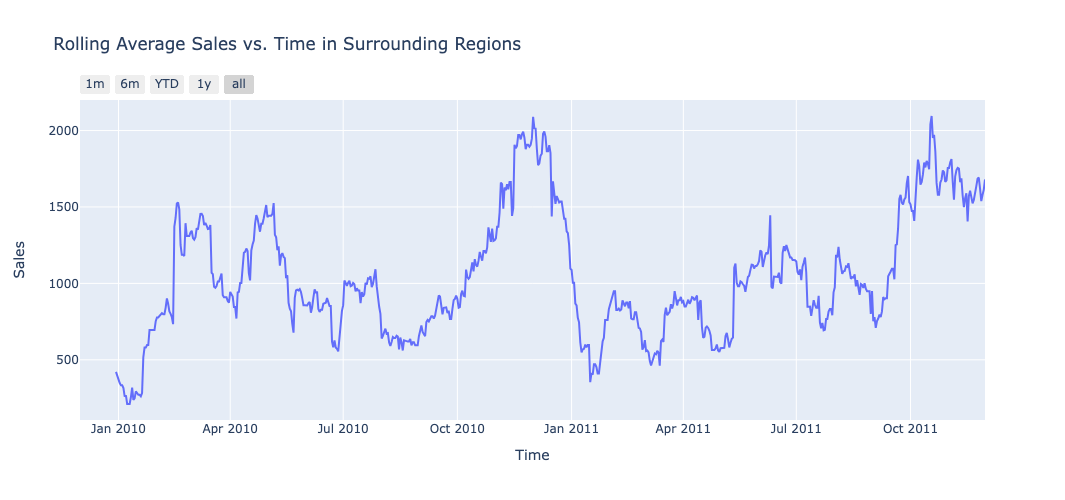

In [64]:
# Filter the DataFrame for specified countries
countries = ["Belgium", "Denmark", "Iceland", "Poland", "Germany", "Netherlands", "Norway", "Sweden", "Switzerland"]
neighbouring_data = reggressiondf[reggressiondf['Country'].isin(countries)]

# Resample by day ('D') and sum up the Total sales, then compute rolling average
data01 = neighbouring_data.resample('D')['Total'].sum().rolling(window=30).mean()

# Create a figure and add a trace
fig = go.Figure()
fig.add_trace(go.Scatter(x=data01.index, y=data01, mode='lines', name="Surrounding Regions"))

# Update layout
fig.update_layout(
    yaxis_title="Sales",
    xaxis_title="Time",
    title="Rolling Average Sales vs. Time in Surrounding Regions",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        type="date"
    ),
    width = 700,
    height = 500
)

fig.show()

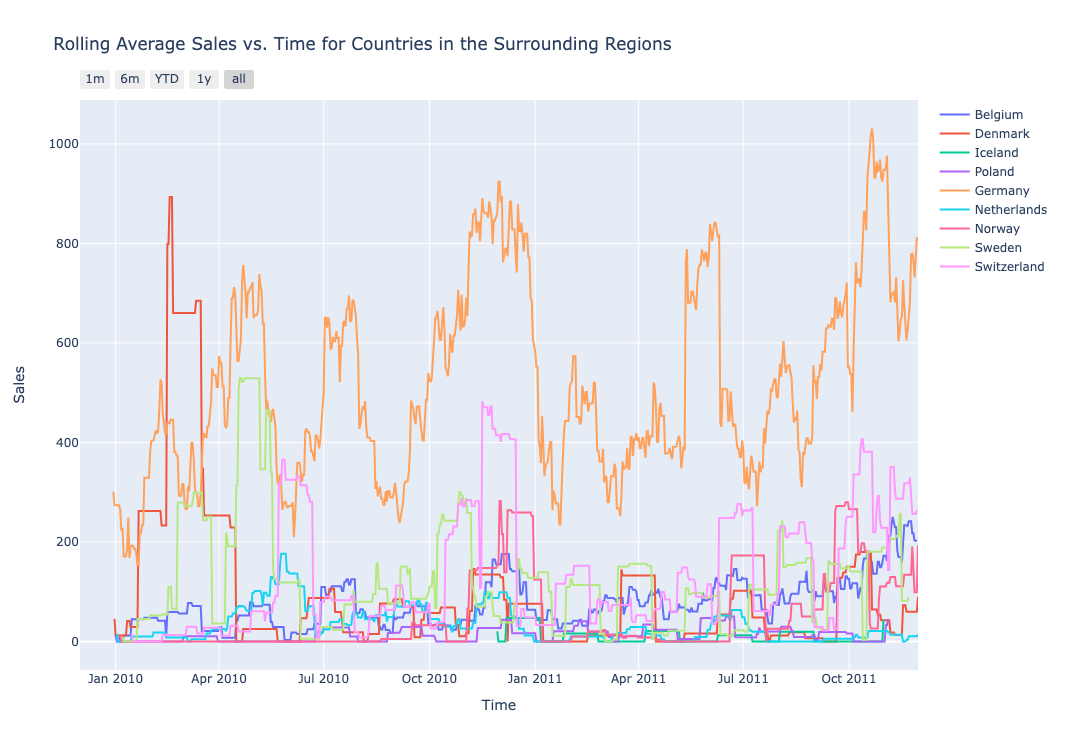

In [65]:
# List of countries for filtering
countries = ["Belgium", "Denmark", "Iceland", "Poland", "Germany", "Netherlands", "Norway", "Sweden", "Switzerland"]

fig = go.Figure()

for country in countries:
    # Filter the DataFrame for the current country
    country_data = reggressiondf[reggressiondf['Country'] == country]
    
    # Resample by day ('D') and sum up the Total sales, then compute rolling average
    data = country_data.resample('D')['Total'].sum().rolling(window=30).mean()
    
    # Add a trace for each country
    fig.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name=country))

# Update layout
fig.update_layout(
    yaxis_title="Sales",
    xaxis_title="Time",
    title="Rolling Average Sales vs. Time for Countries in the Surrounding Regions",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        type="date"
    ),
    width=1050, 
    height=750
)

fig.show()

In [66]:
'''
#day of month in UK analysis 
# Selecting UK as the country for plotting 
uk_data2 = reggressiondf[reggressiondf['Country'] == "United Kingdom"]

# Create a 'YearMonth' column for grouping by year and month, and a 'Day' column
uk_data2['YearMonth'] = uk_data2['Invoice Date'].dt.to_period('M')
uk_data2['Day'] = uk_data2['Invoice Date'].dt.day  # Corrected line

# Ensure operations on uk_data2 do not affect the original DataFrame
uk_data2 = uk_data2.copy()

# Group by 'YearMonth' and 'Day' and calculate the average of 'Total' for each day
daily_avg_sales = uk_data2.groupby(['YearMonth', 'Day'])['Total'].mean().reset_index()

# Pivot the DataFrame to have 'Day' as columns, 'YearMonth' as index, and average 'Total' as values
pivot_data = daily_avg_sales.pivot(index='YearMonth', columns='Day', values='Total')

# Plotting
fig = go.Figure()

# Add a trace for each month
for index, row in pivot_data.iterrows():
    fig.add_trace(go.Scatter(x=row.index, y=row.values, mode='lines+markers', name=str(index)))

# Update layout
fig.update_layout(
    yaxis_title="Average Daily Sales",
    xaxis_title="Day of the Month",
    title="Daily Sales Trend within Each Month for the UK",
    width=1050,  # For a larger viewing screen
    height=750
)

fig.show()
'''

'\n#day of month in UK analysis \n# Selecting UK as the country for plotting \nuk_data2 = reggressiondf[reggressiondf[\'Country\'] == "United Kingdom"]\n\n# Create a \'YearMonth\' column for grouping by year and month, and a \'Day\' column\nuk_data2[\'YearMonth\'] = uk_data2[\'Invoice Date\'].dt.to_period(\'M\')\nuk_data2[\'Day\'] = uk_data2[\'Invoice Date\'].dt.day  # Corrected line\n\n# Ensure operations on uk_data2 do not affect the original DataFrame\nuk_data2 = uk_data2.copy()\n\n# Group by \'YearMonth\' and \'Day\' and calculate the average of \'Total\' for each day\ndaily_avg_sales = uk_data2.groupby([\'YearMonth\', \'Day\'])[\'Total\'].mean().reset_index()\n\n# Pivot the DataFrame to have \'Day\' as columns, \'YearMonth\' as index, and average \'Total\' as values\npivot_data = daily_avg_sales.pivot(index=\'YearMonth\', columns=\'Day\', values=\'Total\')\n\n# Plotting\nfig = go.Figure()\n\n# Add a trace for each month\nfor index, row in pivot_data.iterrows():\n    fig.add_trace(

### Seasonal decomposition
why we do seasonal decomposition: to better understand how the noise in the data and the actual trend in the data differ. since seasonality is difficult for businesses to control. what the business can do is to better understand the trends and how to disrupt these trends

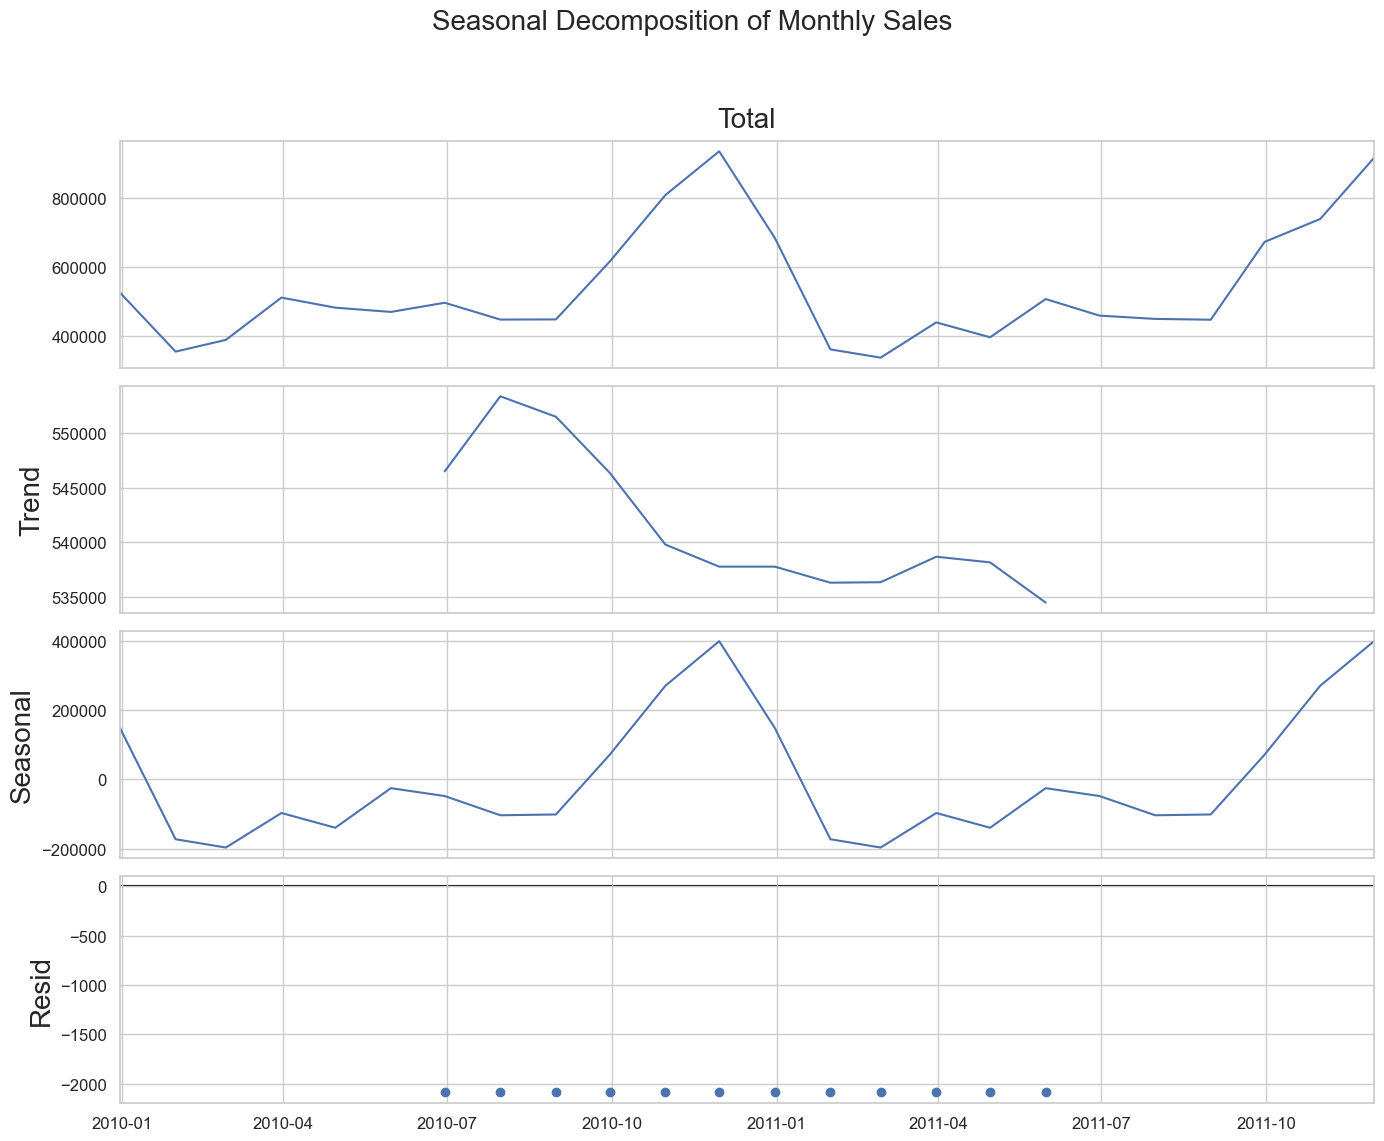

In [67]:
## Seasonal decomposition using rcParams
monthly_sales = reggressiondf.resample('M')['Total'].sum()

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Applying seasonal decomposition to the monthly aggregated sales data
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Customizing plot appearance using rcParams
rcParams['figure.figsize'] = 14,12
rcParams['axes.titlepad'] = 10
rcParams['axes.labelsize'] = 20
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 20

# Plotting the decomposed components of the time series
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Monthly Sales', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the suptitle
plt.show()

### Lag regression features for sales predicition
lag feature are useful in regression models that predict future sales because it is a variable that uses previous data to predict future value

In [68]:
# inputing lag features
lagregressiondf =  reggressiondf.copy()

n_lags = 3  # Number of lags (months) to create
for i in range(1, n_lags + 1):
    lagregressiondf[f'Lag_{i}'] = lagregressiondf['Total'].shift(i)

# Dropping rows with missing values resulting from the shift operation
lagregressiondf.dropna(inplace=True)

# Preparing features and target
X = lagregressiondf[[f'Lag_{i}' for i in range(1, n_lags + 1)]]  # Lag features as predictors
y = lagregressiondf['Total']  # Target variable

In [69]:
## simple linear regression model
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

MSE: 2347.72


<function matplotlib.pyplot.show(close=None, block=None)>

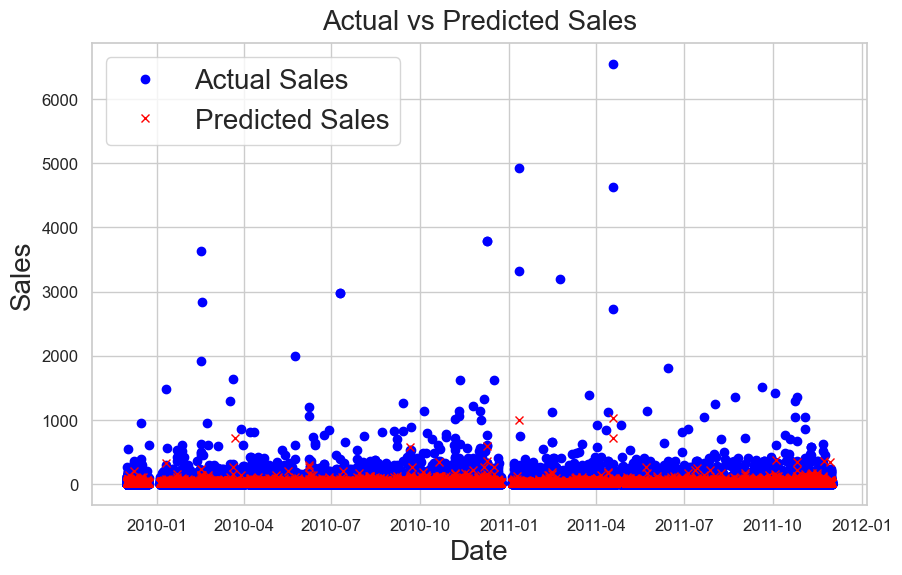

In [70]:
# Calculating RMSE
MSE = mean_squared_error(y_test, y_pred)
print(f"MSE: {MSE:.2f}")

# Plotting actual vs. predicted sales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='blue', marker='o', linestyle='None')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='red', marker='x', linestyle='None')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show

from the results, the RMSE of the linear regresssion based on a 3 month lag does not seem to provide any insightful prediction of sales especially in the detection of higher sales data. this is perhaps due to the seasonal nature that averages out over time as the sales accross the year increase and then decreases towards the end of the year. 


## Regression modeling
since we already prepared the inputs of the lag feature previously in the linear regression model, we will use the split X and Y readily

Random Forest - MSE: 2331.6503


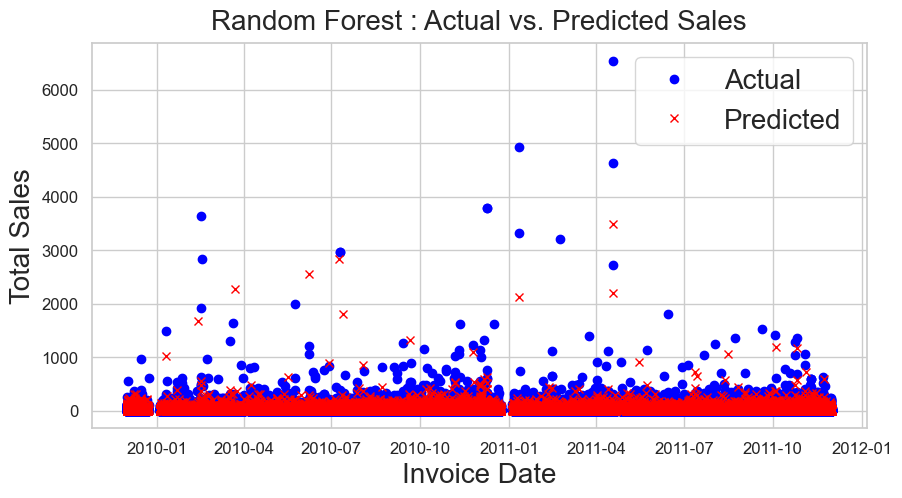

Gradient Boosting - MSE: 2222.6981


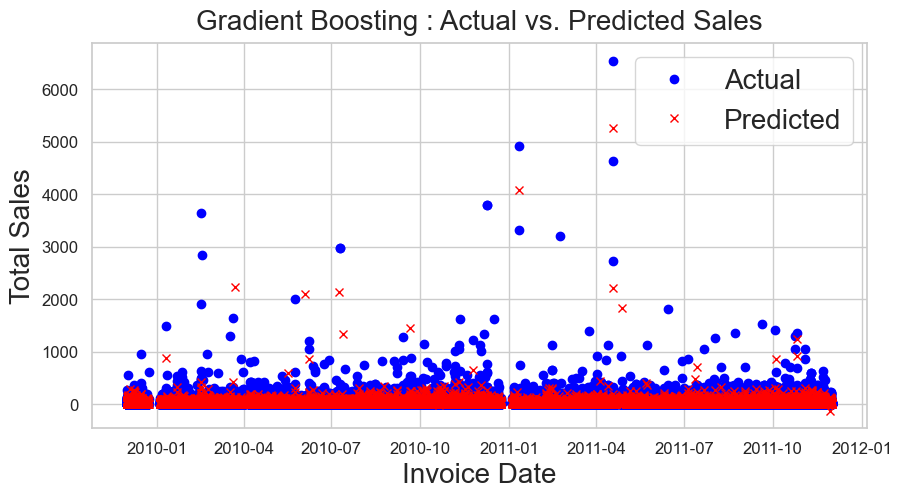

In [71]:
# Initializing the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Dictionary to hold models for iteration
models = {'Random Forest': rf_model, 'Gradient Boosting': gb_model}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} - MSE: {mse:.4f}')
    
    # Plotting actual vs. predicted sales for comparison
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test, label='Actual', marker='o', color='blue',  linestyle='None')
    plt.plot(y_test.index, y_pred, label='Predicted', marker='x', color='red',  linestyle='None')
    plt.title(f'{name} : Actual vs. Predicted Sales')
    plt.xlabel('Invoice Date')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.show()

End of coursework, methods like ARIMA can be used and compared against the models above. Thank you

### ARIMA 
since the MSE seems slightly high, employ the ARIMA model that has the potential to improve seasonal models

there are 3 params to determine a good arima model,  
p (the order of the autoregressive part), 
d (the degree of first differencing involved), and 
q (the order of the moving average part).

In [72]:
'''
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Defining and fitting the ARIMA model (example with arbitrary order (1,1,1))
# It's crucial to experiment with different orders to find the best fit
arima_model = ARIMA(y_train, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecasting
forecast = arima_result.forecast(steps=len(y_test))
forecast_index = y_test.index

# Evaluating the ARIMA model
mse = mean_squared_error(y_test, forecast)
print(f'ARIMA - MSE: {mse:.4f}')

# Plotting forecast against actual sales
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', marker='o', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', marker='x', color='red')
plt.title('ARIMA Forecast vs. Actual Sales')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()
'''

"\nfrom statsmodels.tsa.arima.model import ARIMA\nfrom statsmodels.graphics.tsaplots import plot_predict\n\n# Defining and fitting the ARIMA model (example with arbitrary order (1,1,1))\n# It's crucial to experiment with different orders to find the best fit\narima_model = ARIMA(y_train, order=(1, 1, 1))\narima_result = arima_model.fit()\n\n# Forecasting\nforecast = arima_result.forecast(steps=len(y_test))\nforecast_index = y_test.index\n\n# Evaluating the ARIMA model\nmse = mean_squared_error(y_test, forecast)\nprint(f'ARIMA - MSE: {mse:.4f}')\n\n# Plotting forecast against actual sales\nplt.figure(figsize=(10, 5))\nplt.plot(y_test.index, y_test, label='Actual', marker='o', color='blue')\nplt.plot(forecast_index, forecast, label='Forecast', marker='x', color='red')\nplt.title('ARIMA Forecast vs. Actual Sales')\nplt.xlabel('Invoice Date')\nplt.ylabel('Total Sales')\nplt.legend()\nplt.show()\n"

In [73]:
'''
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

ARIMAdf = reggressiondf.copy()
# 1. Ensure Stationarity
# Plotting the time series
daily_sales = ARIMAdf.resample('M')['Total'].sum()
plt.figure()
daily_sales.plot(marker='o', linestyle='-', color='blue')
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Day', fontsize=6)
plt.ylabel('Total Sales', fontsize=14)

# Performing Augmented Dickey-Fuller test
adf_result = adfuller(daily_sales)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

# If p-value > 0.05, the series is not stationary and needs differencing

# 2. Determine the Degree of Differencing (d)
# This is an iterative process. Start with d=0 and increase until stationary.
# This example assumes you've determined d after checking stationarity post differencing

d = 1  # Example value, adjust based on your series

# 3. Identify the Order of the AR (p) and MA (q) Terms
# Generating ACF and PACF plots to help determine p and q
lags = 20  # Number of lags to show, can be adjusted based on the series length

# ACF plot
plt.figure()
plt.subplot(211)
plot_acf(time_series.diff().dropna(), ax=plt.gca(), lags=lags)

# PACF plot
plt.subplot(212)
plot_pacf(time_series.diff().dropna(), ax=plt.gca(), lags=lags)
plt.show()

# Determine p and q based on where the PACF and ACF plots cross the significance level

p = 2  # Example value, adjust based on PACF plot
q = 2  # Example value, adjust based on ACF plot

# 4. Model Estimation and Selection
# Fitting the ARIMA model
model = ARIMA(time_series, order=(p, d, q))
model_fit = model.fit()

# Print out summary information on the fit
print(model_fit.summary())

# 5. Model Diagnostics
# Checking residuals to ensure no patterns (which suggests good model fit)
residuals = model_fit.resid
residuals.plot(title='Residuals')
plt.show()
residuals.plot(kind='kde', title='Density of Residuals')
plt.show()

# Perform additional diagnostic tests here

# 6. Validation
# The following steps are conceptual. Implement based on your data's split between training and test sets
# predictions = model_fit.forecast(steps=number_of_steps_ahead)
# Compare predictions with the actual values'''
'''

SyntaxError: incomplete input (1352092310.py, line 71)

In [ ]:
'''
# will not be using arima model as too much computing is required
# Finding model params for ARIMA
import statsmodels.api as sm
import itertools

# Exctracting 'y' from our ARIMA df
y = ARIMAdf['Total']

# Define the p, d, q parameters to take any value between 0 and 2 (inclusive) (keeping within a range to avoid over computing)
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q for ARIMA
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_pdq = None
best_model_summary = None

# Iterate over all combinations of p, d, q parameters
for param in pdq:
    try:
        mod = sm.tsa.ARIMA(y, order=param)
        results = mod.fit()
        
        # Check if the current model's AIC is lower than the best found so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model_summary = results.summary()
            
    except:
        # This block will catch and ignore any errors during model fitting
        continue

# Print the best model's parameters and AIC
if best_pdq is not None:
    print(f'Best ARIMA{best_pdq} - AIC:{best_aic}')
    print(best_model_summary)
else:
    print("Could not find a suitable ARIMA model.")
'''

## Creating df for modeling

In [74]:
### Preparing a data frame for regression
regression_model_df = df_cleaned.copy()
regression_model_df = regression_model_df.set_index('InvoiceDate')
regression_model_df.loc[:, 'Total'] = regression_model_df['Quantity'] * regression_model_df['Price']


# removing the columns that are not in the model
# List of columns to be removed
columns_to_remove = ['Invoice', 'StockCode', 'Description', 'Quantity', 'Price', 'Customer ID', 'Country', 'Year']

# Dropping the columns from the DataFrame
regression_model_df = regression_model_df.drop(columns=columns_to_remove, errors='ignore')

regression_model_df.head()

Total
InvoiceDate               
2009-12-01 07:45:00   83.4
2009-12-01 07:45:00   81.0
2009-12-01 07:45:00   81.0
2009-12-01 07:45:00  100.8
2009-12-01 07:45:00   30.0

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Preprocessing
X = np.arange(len(regression_model_df)).reshape(-1, 1)
y = regression_model_df['Total'].values

# Split data into training and testing sets based on the date
split_date = regression_model_df.index[-3]
train = regression_model_df[regression_model_df.index < split_date]
test = regression_model_df[regression_model_df.index >= split_date]

X_train = np.arange(len(train)).reshape(-1, 1)
y_train = train['Total'].values
X_test = np.arange(len(train), len(regression_model_df)).reshape(-1, 1)
y_test = test['Total'].values

# Initialize models
models = {
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=20, random_state=0, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=20, random_state=0)
}

# Train, predict, and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluation
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")
    
    # Plot actual vs predicted sales
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, y_train, label='Train (actual)')
    plt.plot(test.index, y_test, label='Test (actual)')
    plt.plot(test.index, predictions, label=f'Test (predicted - {name})', linestyle='-')
    plt.title(f'Sales Forecast - {name}')
    plt.xlabel('Date')
    plt.ylabel('Sales Total')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=0)  # limiting the depth of the tree
}

# Use a smaller sample of the data if necessary (uncomment the following line)
# df_sample = df.sample(frac=0.1, random_state=0)  # take a 10% sample of the dataframe

# Train, predict, and evaluate models with reduced complexity
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluation
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    results[name] = (mae, mse, rmse)

# Display results without plotting
for name, (mae, mse, rmse) in results.items():
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")
